# Importing the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')
!pwd

/content/drive/MyDrive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/First200,000.xlsx')


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/appliied dataset fuull one.xlsx')

# Cleaning the dataset - Removing Columns/ Fixing Null data/ Encoding using LabelEncoder


Dataset shape: (199999, 34)

First 5 rows:
   Health Service Area Hospital County  Operating Certificate Number  \
0          Western NY        Allegany                      226700.0   
1          Western NY        Allegany                      226700.0   
2          Western NY        Allegany                      226700.0   
3          Western NY        Allegany                      226700.0   
4          Western NY        Allegany                      226700.0   

   Facility Id               Facility Name    Age Group Zip Code - 3 digits  \
0         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
1         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
2         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
3         37.0  Cuba Memorial Hospital Inc     50 to 69                 147   
4         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   

  Gender   Race          Ethnicity  ...  APR Risk of M

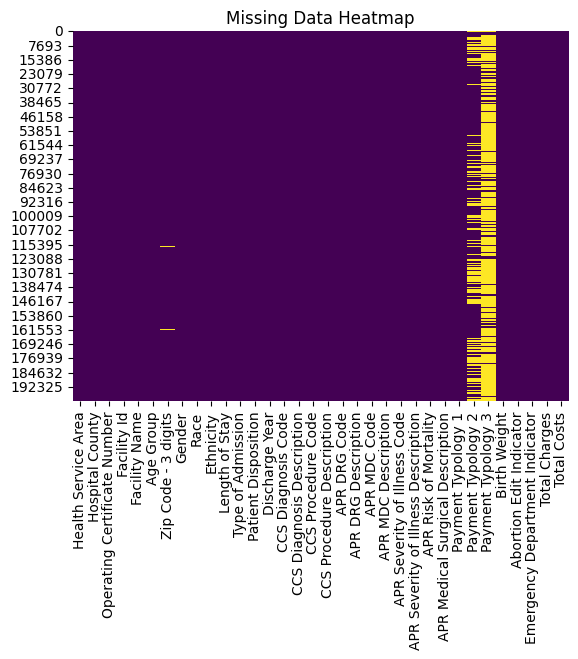

In [ ]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Basic Information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumn Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())

# Check and visualize missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values[missing_values > 0])
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Handle missing values
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [ ]:
df.drop(columns=['CCS Procedure Description','APR DRG Description','APR MDC Description','Payment Typology 2', 'Payment Typology 3',
                 'Zip Code - 3 digits', 'Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility Id', 'Birth Weight', 'Abortion Edit Indicator'], inplace=True)

In [ ]:
df.drop(columns=[ 'Total Charges', 'Facility Name', 'Race', 'Ethnicity'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the Gender column
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity']) # f = 0, m = 1
#df.head()






In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender']) #f = 0 m =1

In [ ]:
df['Race'] = label_encoder.fit_transform(df['Race'])

In [ ]:
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])

In [ ]:
df['Facility Name'] = label_encoder.fit_transform(df['Facility Name'])

In [ ]:
df['Type of Admission'] = label_encoder.fit_transform(df['Type of Admission'])

In [ ]:
df['Patient Disposition'] = label_encoder.fit_transform(df['Patient Disposition'])

In [ ]:

df['Age Group'] = label_encoder.fit_transform(df['Age Group'])


In [ ]:
df['Emergency Department Indicator'] = label_encoder.fit_transform(df['Emergency Department Indicator'])

In [ ]:
df['CCS Diagnosis Description'] = label_encoder.fit_transform(df['CCS Diagnosis Description'])
df['APR Severity of Illness Description'] = label_encoder.fit_transform(df['APR Severity of Illness Description'])

In [ ]:
columns_to_encode = ['APR Risk of Mortality','APR Medical Surgical Description','Payment Typology 1']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

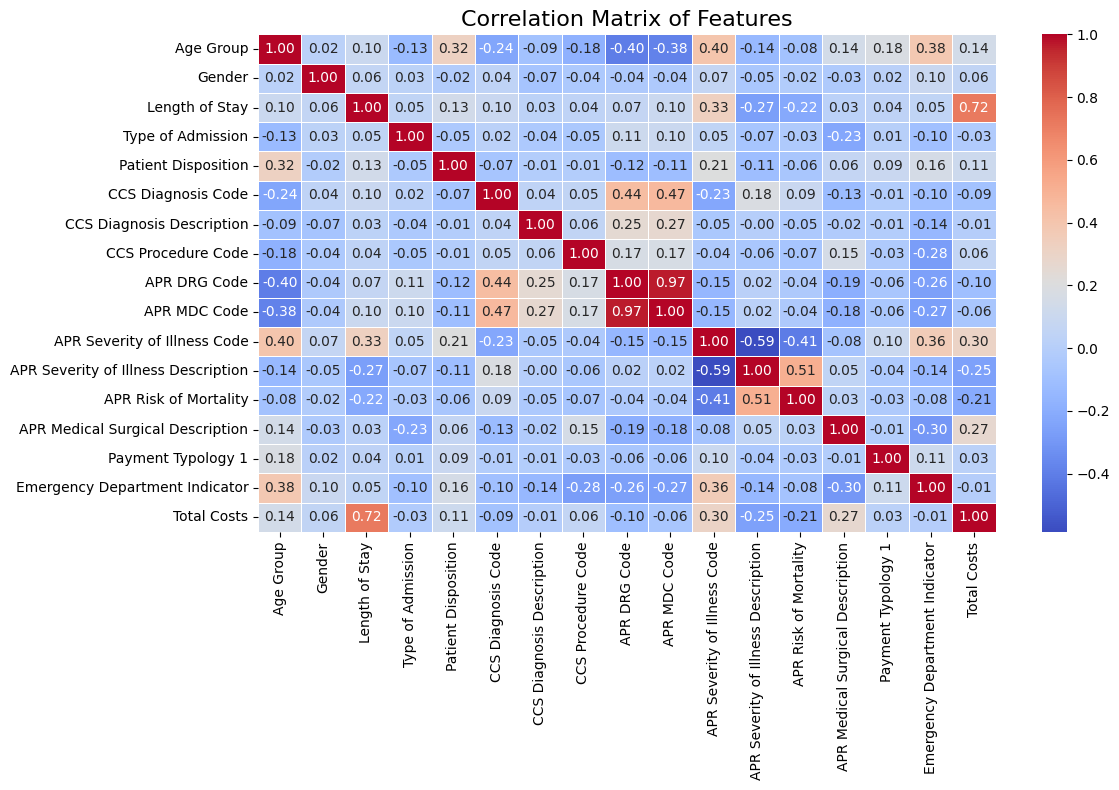

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()


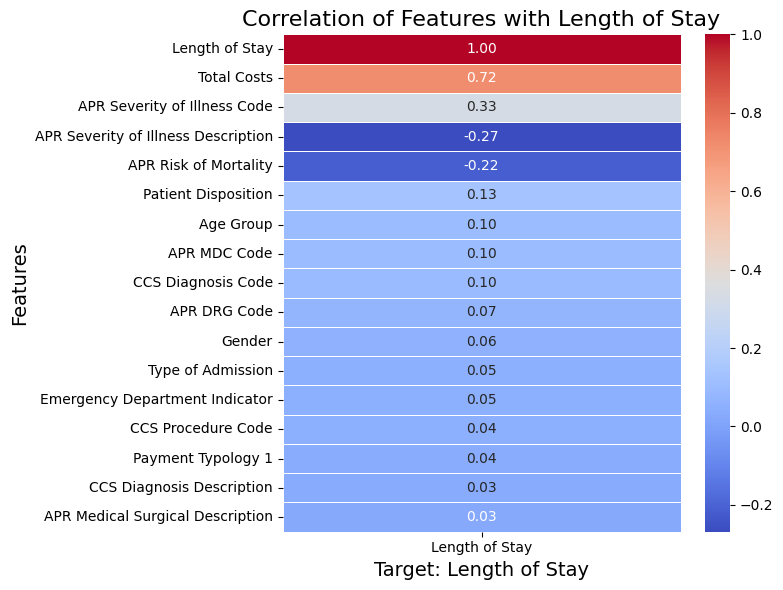

In [ ]:
# Sorting features by absolute correlation with Length of Stay
sorted_corr = correlation_matrix['Length of Stay'].abs().sort_values(ascending=False)
sorted_corr_matrix = correlation_matrix.loc[sorted_corr.index, ['Length of Stay']]

# Plotting the heatmap with sorted correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    sorted_corr_matrix,  # Sorted features by absolute correlation
    annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.title("Correlation of Features with Length of Stay", fontsize=16)
plt.xlabel("Target: Length of Stay", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_with_length_of_stay_sorted.png", dpi=300)
plt.show()




In [ ]:
df.head()

Facility Name  Age Group  Gender  Race  Ethnicity  Length of Stay  \
0              4          4       0     3          1             4.0   
1              4          4       0     3          1             4.0   
2              4          4       0     3          1             4.0   
3              4          3       0     3          1             2.0   
4              4          4       1     3          1             2.0   

   Type of Admission  Patient Disposition  CCS Diagnosis Code  \
0                  5                    7               122.0   
1                  0                    9                55.0   
2                  5                    7               122.0   
3                  0                    7                55.0   
4                  0                    7               122.0   

   CCS Diagnosis Description  ...  APR DRG Code  APR MDC Code  \
0                        218  ...         139.0           4.0   
1                         94  ...         422.0          10.0   
2                        218  ...         139.0           4.0   
3                         94  ...         249.0           6.0   
4                        218  ...         139.0           4.0   

   APR Severity of Illness Code  APR Severity of Illness Description  \
0                           2.0                                    3   
1                           2.0                                    3   
2                           1.0                                    2   
3                           2.0                                    3   
4                           1.0                                    2   

   APR Risk of Mortality  APR Medical Surgical Description  \
0                      2                                 0   
1                      3                                 0   
2                      2                                 0   
3                      2                                 0   
4                      3                                 0   

   Payment Typology 1  Emergency Department Indicator  Total Charges  \
0                   5                               1        5333.90   
1                   5                               1        4865.99   
2                   5                               1        5901.54   
3                   5                               1        3619.08   
4                   5                               1        3185.87   

   Total Costs  
0      4818.42  
1      4588.78  
2      5559.56  
3      3567.25  
4      3167.89  

[5 rows x 21 columns]

# Baseline Model


In [ ]:
df_encoded.columns

Index(['Length of Stay', 'Total Charges', 'Total Costs', 'Age Group_18 to 29',
       'Age Group_30 to 49', 'Age Group_50 to 69', 'Age Group_70 or Older',
       'Gender_M', 'Gender_U', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'Ethnicity_Not Span/Hispanic',
       'Ethnicity_Spanish/Hispanic', 'Ethnicity_Unknown',
       'Type of Admission_Emergency', 'Type of Admission_Newborn',
       'Type of Admission_Not Available', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'APR Severity of Illness Description_Major',
       'APR Severity of Illness Description_Minor',
       'APR Severity of Illness Description_Moderate',
       'APR Risk of Mortality_Major', 'APR Risk of Mortality_Minor',
       'APR Risk of Mortality_Moderate',
       'APR Medical Surgical Description_Not Applicable',
       'APR Medical Surgical Description_Surgical',
       'Payment Typology 1_Department of Corrections',
       'Payment Typology 1_Federal/State/Local/VA',
       'Payme

Baseline Model (Linear Regression) Metrics:
MAE: 2.25
RMSE: 4.78
R²: 0.62


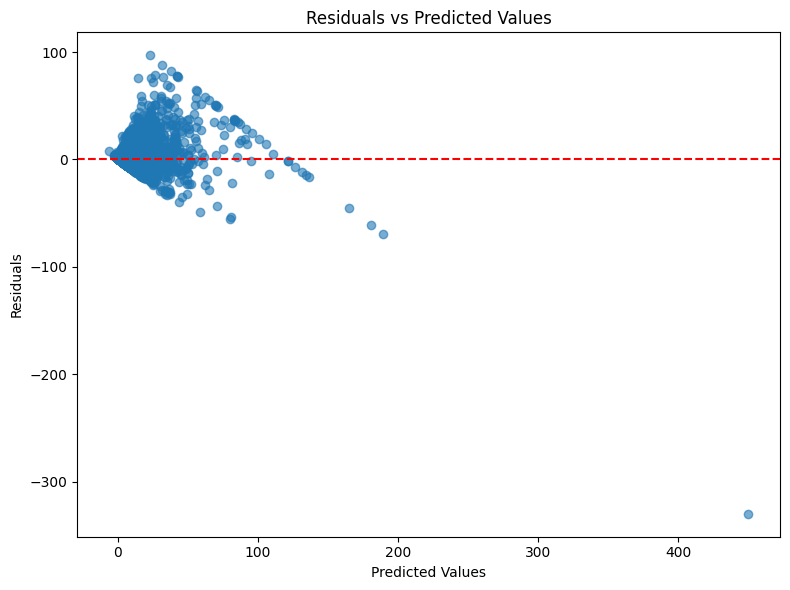

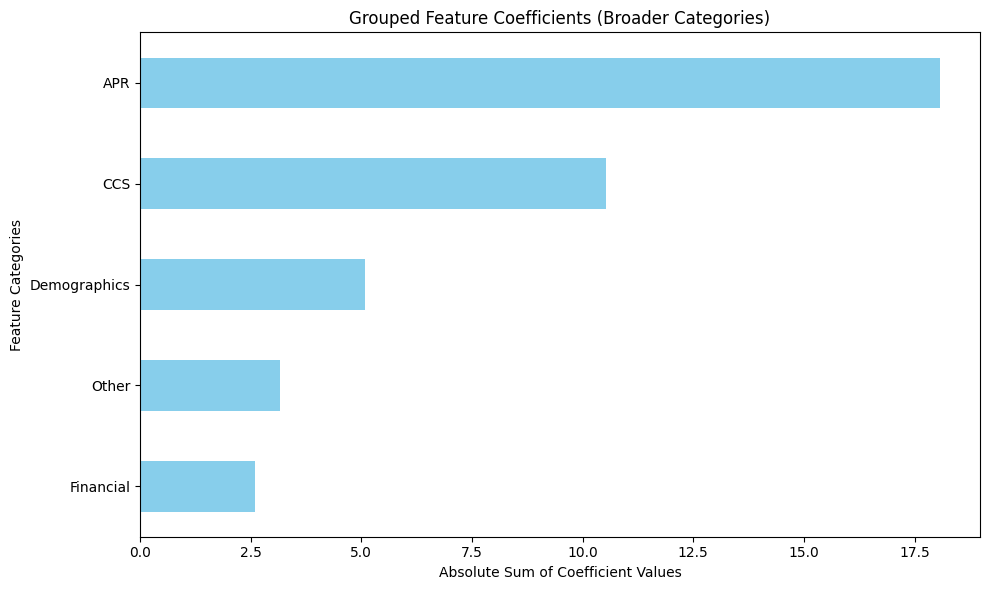

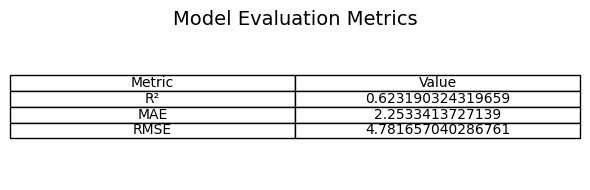

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the target variable
target_variable = 'Length of Stay'  # Modify if your target is different

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features (optional, modify as needed)
X = X.fillna(0)  # Example: Fill missing values with 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Train the Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on test data
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the model
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_r2 = r2_score(y_test, y_pred_baseline)

# Display evaluation metrics
print("Baseline Model (Linear Regression) Metrics:")
print(f"MAE: {baseline_mae:.2f}")
print(f"RMSE: {baseline_rmse:.2f}")
print(f"R²: {baseline_r2:.2f}")

# Plot residuals vs predicted values
residuals = y_test - y_pred_baseline
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_baseline, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Coefficients grouped by broader categories
coefficients = baseline_model.coef_
feature_names = X.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Categorize features into broader categories
def categorize_feature(feature):
    if feature.startswith('APR'):
        return 'APR'
    elif feature.startswith('CCS'):
        return 'CCS'
    elif 'Diagnosis' in feature:
        return 'Diagnosis'
    elif 'Procedure' in feature:
        return 'Procedure'
    elif 'Age' in feature or 'Ethnicity' in feature:
        return 'Demographics'
    elif 'Payment' in feature or 'Charges' in feature:
        return 'Financial'
    else:
        return 'Other'

coeff_df['Category'] = coeff_df['Feature'].apply(categorize_feature)

# Aggregate coefficients by category
grouped_coeff = coeff_df.groupby('Category').Coefficient.sum().abs().sort_values(ascending=False)

# Plot the grouped coefficients
plt.figure(figsize=(10, 6))
grouped_coeff.plot(kind='barh', color='skyblue')
plt.title("Grouped Feature Coefficients (Broader Categories)")
plt.xlabel("Absolute Sum of Coefficient Values")
plt.ylabel("Feature Categories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Create a summary table for metrics
metrics_df = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE'],
    'Value': [baseline_r2, baseline_mae, baseline_rmse]
})

# Display the metrics as a table
plt.figure(figsize=(6, 2))
plt.axis('off')
plt.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center', cellLoc='center')
plt.title("Model Evaluation Metrics", fontsize=14)
plt.tight_layout()
plt.show()







Ridge Regression Metrics:
MAE: 2.25
RMSE: 4.78
R²: 0.62


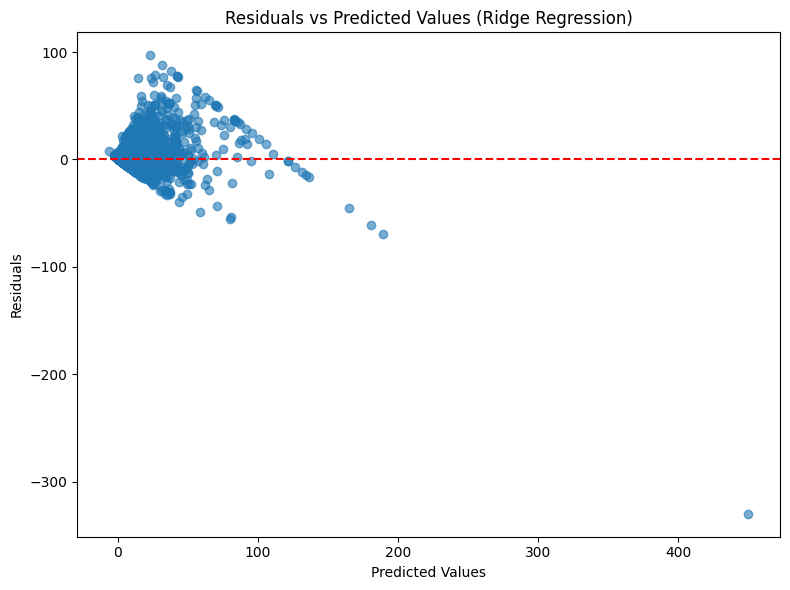

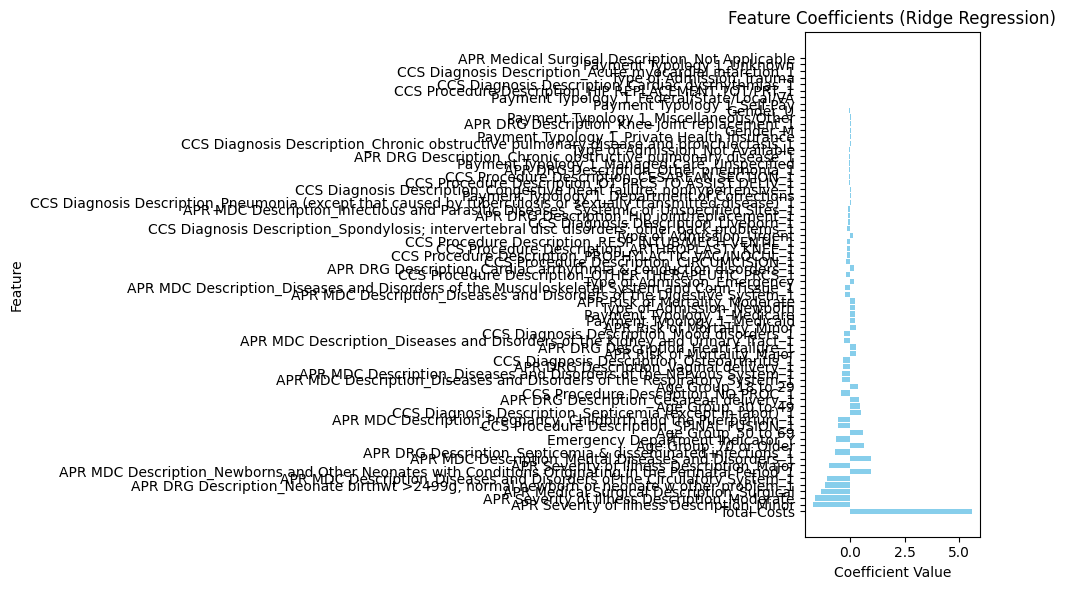

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the target variable
target_variable = 'Length of Stay'  # Modify if your target is different

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features
X = X.fillna(0)  # Example: Fill missing values with 0

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=47)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Regularization strength (alpha > 0)
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Display evaluation metrics
print("Ridge Regression Metrics:")
print(f"MAE: {ridge_mae:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²: {ridge_r2:.2f}")

# Plot residuals vs predicted values
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (Ridge Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plot feature coefficients
coefficients = ridge_model.coef_
feature_names = X.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by magnitude
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')
plt.title("Feature Coefficients (Ridge Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# RF


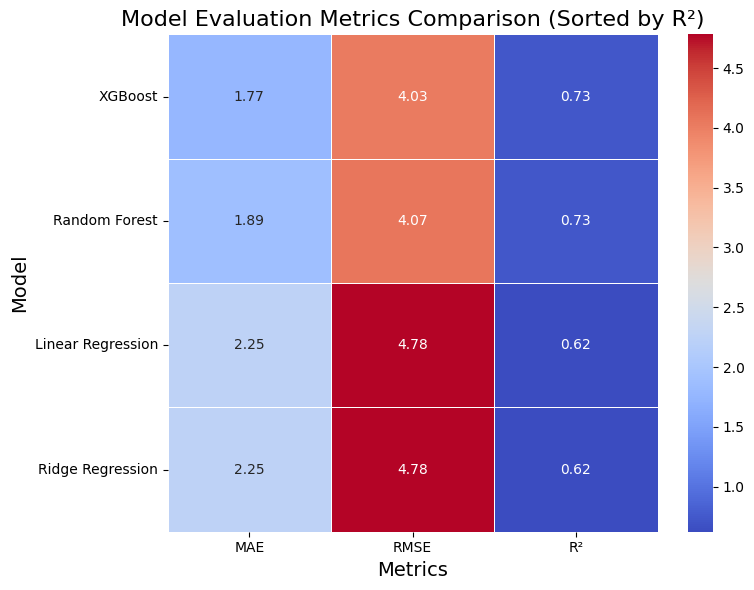

In [ ]:
# Compile metrics from all models into a DataFrame
metrics_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Ridge Regression'],
    'MAE': [baseline_mae, rf_mae, mae_xgb, ridge_mae],
    'RMSE': [baseline_rmse, rf_rmse, rmse_xgb, ridge_rmse],
    'R²': [baseline_r2, rf_r2, r2_xgb, ridge_r2]
})

# Sort models by R² in descending order (best-performing first)
metrics_comparison = metrics_comparison.sort_values(by='R²', ascending=False)

# Plot heatmap of metrics
plt.figure(figsize=(8, 6))
sns.heatmap(
    metrics_comparison.set_index('Model'),  # Use models as the index
    annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.title("Model Evaluation Metrics Comparison (Sorted by R²)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.tight_layout()
plt.savefig("model_metrics_comparison_heatmap_sorted.png", dpi=300)
plt.show()



In [ ]:
df.columns

Index(['Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import xgboost as xgb

# Select features relevant to predicting the number of hospital stay days
selected_features = [
    'Age Group', 'Gender', 'APR Risk of Mortality',
    'APR Medical Surgical Description', 'Payment Typology 1',
    'Emergency Department Indicator', 'Total Costs'
]

# Define target variable (e.g., hospital stay days or costs)
target_variable = 'Length of Stay'  # Modify if your target is different

# Drop rows with missing target values
df = df.dropna(subset=[target_variable])

# Convert categorical features to numeric using Label Encoding
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    if column in selected_features:  # Only encode features we're using
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Splitting data into features (X) and target (y)
X = df[selected_features]
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics for Random Forest Model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# XGBoost Model
xgb_model_gb = xgb.XGBRegressor(
    objective="reg:squarederror",  # Regression objective
    n_estimators=100,              # Number of trees
    learning_rate=0.1,             # Step size shrinkage
    max_depth=7,                   # Maximum depth of a tree
    random_state=42                # Reproducibility
)

# Train the model
xgb_model_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model_gb.predict(X_test)

# Evaluate predictions
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print metrics for Random Forest
print("\nRandom Forest Model Metrics:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")

# Print metrics for XGBoost
print("\nXGBoost Model Metrics:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R²: {r2_xgb}")





Random Forest Model Metrics:
MAE: 1.8895068785714288
RMSE: 4.068195277000672
R²: 0.7272474739086352

XGBoost Model Metrics:
MAE: 1.769468014196679
RMSE: 4.034403217501066
R²: 0.7317598462104797


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Actual vs. Predicted Plots
models = ['Linear Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred_baseline, y_pred_rf, y_pred_xgb]

for model, y_pred in zip(models, predictions):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.title(f'Actual vs. Predicted Values ({model})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
    plt.show()

# Residual Distribution Plot for Each Model
for model, y_pred in zip(models, predictions):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue')
    plt.title(f'Residual Distribution ({model})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

# Metric Comparison Bar Chart
metrics = ['MAE', 'RMSE', 'R²']
linear_values = [baseline_mae, baseline_rmse, baseline_r2]
rf_values = [rf_mae, rf_rmse, rf_r2]
xgb_values = [mae_xgb, rmse_xgb, r2_xgb]

metric_df = pd.DataFrame({
    'Metric': metrics,
    'Linear Regression': linear_values,
    'Random Forest': rf_values,
    'XGBoost': xgb_values
}).melt(id_vars='Metric', var_name='Model', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=metric_df, x='Metric', y='Value', hue='Model')
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Model')
plt.show()

# K-Fold Cross Validation

ElasticNet Regression - Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
R²: 0.6855, MAE: 2.16, RMSE: 4.37


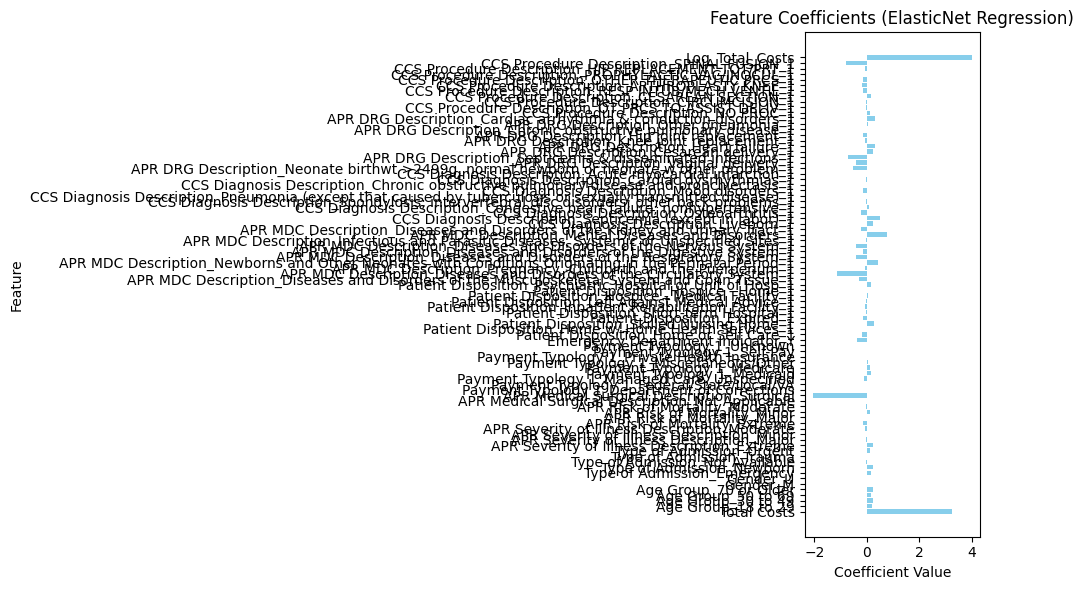

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example dataset placeholder: Replace with your actual dataset
# df_encoded = pd.read_csv("your_dataset.csv")  # Replace with your data loading code

# Define the target variable
target_variable = 'Length of Stay'  # Modify as per your dataset

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features
X = X.fillna(0)  # Fill missing values with 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ElasticNet model
elastic_net = ElasticNet()

# Define hyperparameter grid for alpha and l1_ratio
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mix between L1 (Lasso) and L2 (Ridge)
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_elastic_net = grid_search.best_estimator_

# Predict on the test set
y_pred = best_elastic_net.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the results
print("ElasticNet Regression - Best Parameters:", grid_search.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Feature coefficients
coefficients = best_elastic_net.coef_

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(X.columns, coefficients, color='skyblue')
plt.title("Feature Coefficients (ElasticNet Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
df_encoded['Log_Total_Costs'] = np.log1p(df_encoded['Total Costs'])


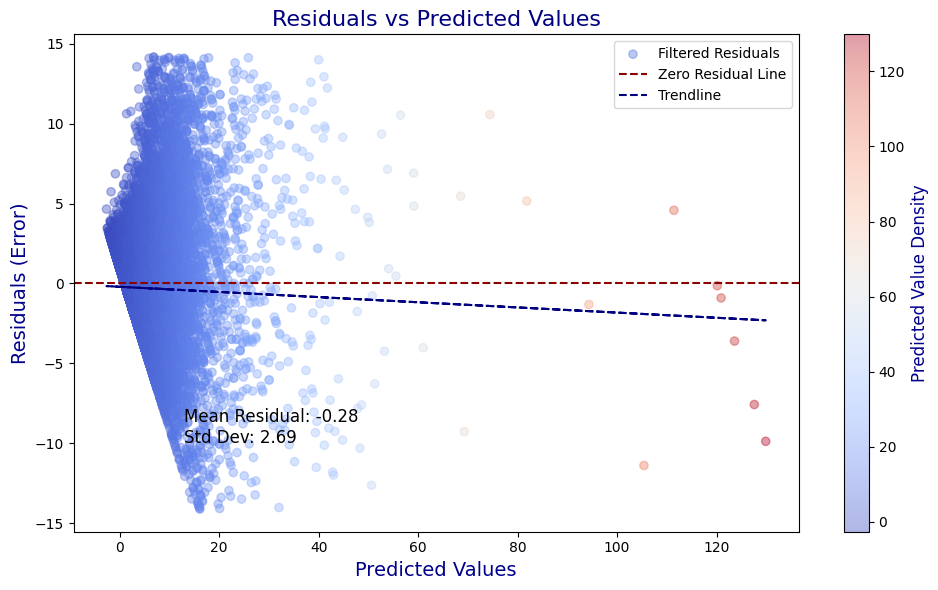

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot residuals with enhancements
plt.figure(figsize=(10, 6))

# Scatter plot of residuals with transparency and color gradient
scatter = plt.scatter(
    y_pred_filtered, residuals_filtered,
    alpha=0.4, c=y_pred_filtered, cmap="coolwarm", label="Filtered Residuals"
)

# Add a horizontal line for zero residuals
plt.axhline(0, color='darkred', linestyle='--', linewidth=1.5, label="Zero Residual Line")

# Add a trendline for residuals
z = np.polyfit(y_pred_filtered, residuals_filtered, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial object
plt.plot(y_pred_filtered, p(y_pred_filtered), color='navy', linestyle='--', label="Trendline")

# Annotate with statistics: mean and standard deviation of residuals
mean_residual = np.mean(residuals_filtered)
std_residual = np.std(residuals_filtered)
plt.text(
    0.1 * max(y_pred_filtered), -10,
    f"Mean Residual: {mean_residual:.2f}\nStd Dev: {std_residual:.2f}",
    fontsize=12, color='black'
)

# Titles and axis labels
plt.title("Residuals vs Predicted Values", fontsize=16, color='navy')
plt.xlabel("Predicted Values", fontsize=14, color='darkblue')
plt.ylabel("Residuals (Error)", fontsize=14, color='darkblue')

# Add a colorbar for the predicted value density
cbar = plt.colorbar(scatter)
cbar.set_label("Predicted Value Density", fontsize=12, color='darkblue')

# Add legend
plt.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig("residuals_vs_predicted_outlier_removed.png", dpi=300)
plt.show()


Outliers Detected:
 54633     33.592264
199676    51.175092
197094    22.910206
42436     19.832168
175831    14.660996
            ...    
70348    -28.882954
62451     26.257842
177623    19.692100
6738     -17.745687
164583    21.459604
Name: Length of Stay, Length: 635, dtype: float64


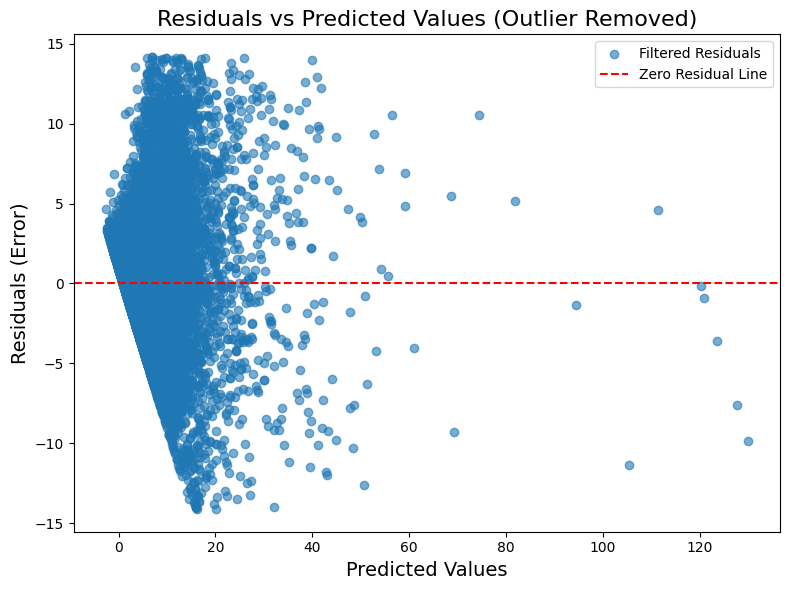

In [ ]:
# Identify residuals and their indices
outlier_threshold = 3 * np.std(residuals)  # Use a threshold of 3 standard deviations
outliers = residuals[residuals.abs() > outlier_threshold]

print("Outliers Detected:\n", outliers)

# Remove the outlier from test data
outlier_indices = outliers.index  # Get indices of outliers
X_test_filtered = X_test.drop(index=outlier_indices)
y_test_filtered = y_test.drop(index=outlier_indices)

# Recalculate predictions on the filtered test set
y_pred_filtered = best_model.predict(X_test_filtered)

# Calculate residuals again
residuals_filtered = y_test_filtered - y_pred_filtered

# Plot residuals vs predicted values (after removing outlier)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_filtered, residuals_filtered, alpha=0.6, label="Filtered Residuals")
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label="Zero Residual Line")
plt.title("Residuals vs Predicted Values (Outlier Removed)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals (Error)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
# Remove the outlier from the test set
X_test_filtered = X_test.drop(index=outlier_indices)
y_test_filtered = y_test.drop(index=outlier_indices)

# Retrain the model with filtered data (optional)
y_pred_filtered = best_model.predict(X_test_filtered)

# Recalculate residuals
residuals_filtered = y_test_filtered - y_pred_filtered



Best Model: Lasso
Best CV Score (R²): 0.5857

Test Set Metrics:
R²: 0.6299, MAE: 2.21, RMSE: 4.74


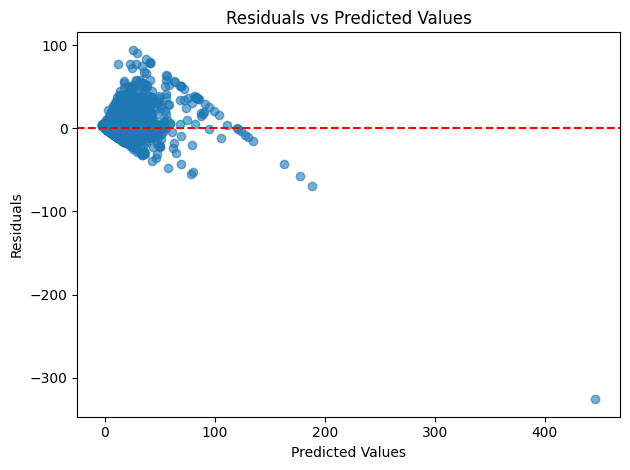

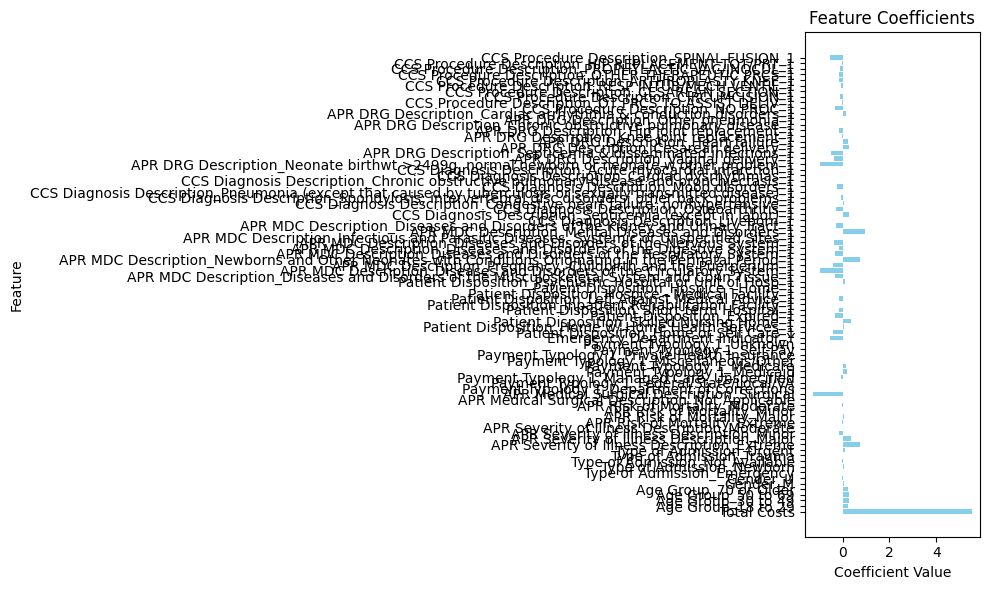

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the target variable
target_variable = 'Length of Stay'  # Modify if your target is different

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features (optional, modify as needed)
X = X.fillna(0)  # Example: Fill missing values with 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Define a pipeline with scaling and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', Lasso())  # Placeholder for model
])

# Set up the hyperparameter grid for Lasso and Linear Regression
param_grid = [
    {
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength for Lasso
    },
    {
        'model': [LinearRegression()]  # No hyperparameters for Linear Regression
    }
]

# Perform Grid Search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Display the best parameters and score
print("\nBest Model:", grid.best_params_['model'].__class__.__name__)
print("Best CV Score (R²):", f"{grid.best_score_:.4f}")

# Evaluate the model on the test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Compute evaluation metrics
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("\nTest Set Metrics:")
print(f"R²: {test_r2:.4f}, MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# Residuals vs Predicted Values Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Feature Coefficients for the Best Model
if hasattr(best_model['model'], 'coef_'):
    coefficients = best_model['model'].coef_
    feature_names = X.columns

    # Plot feature coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.title("Feature Coefficients")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


# XGBoost

In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 14.6 MB/s eta 0:00:00


In [ ]:
df['Total Costs'] = np.log1p(df['Total Costs'])  # Apply log(1 + Total Costs)



XGBoost Model Metrics:
MAE: 1.775075529500097
RMSE: 4.094228355626952
R²: 0.7238230109214783


<ipython-input-67-b8990fcd812b>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")


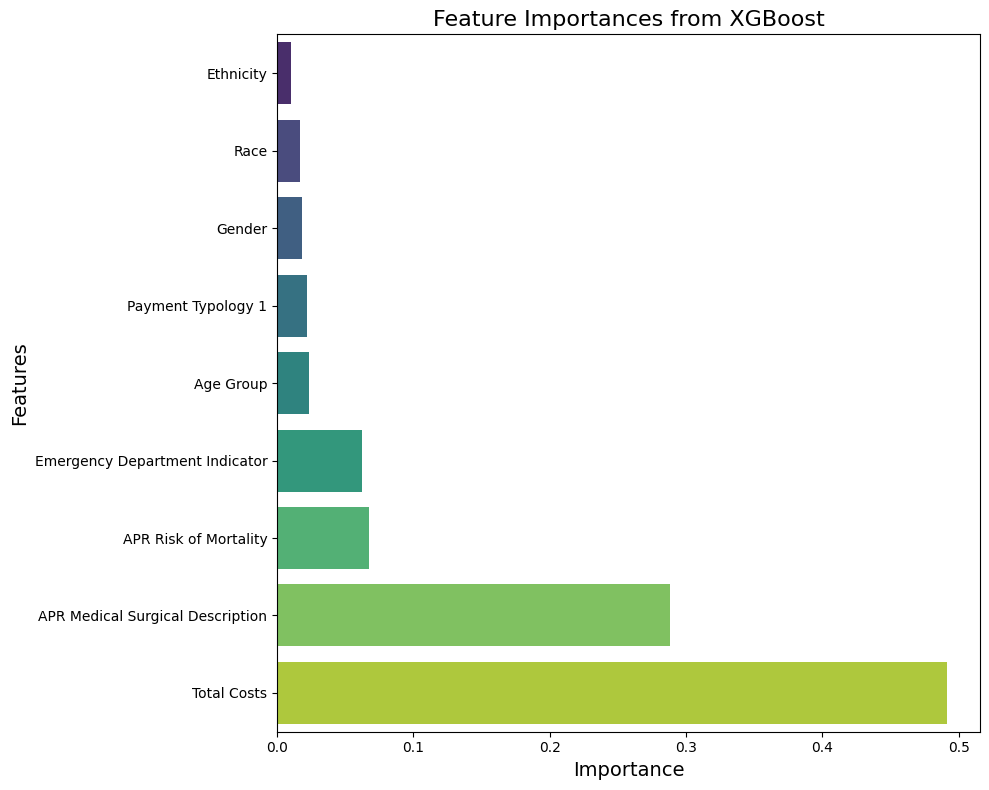

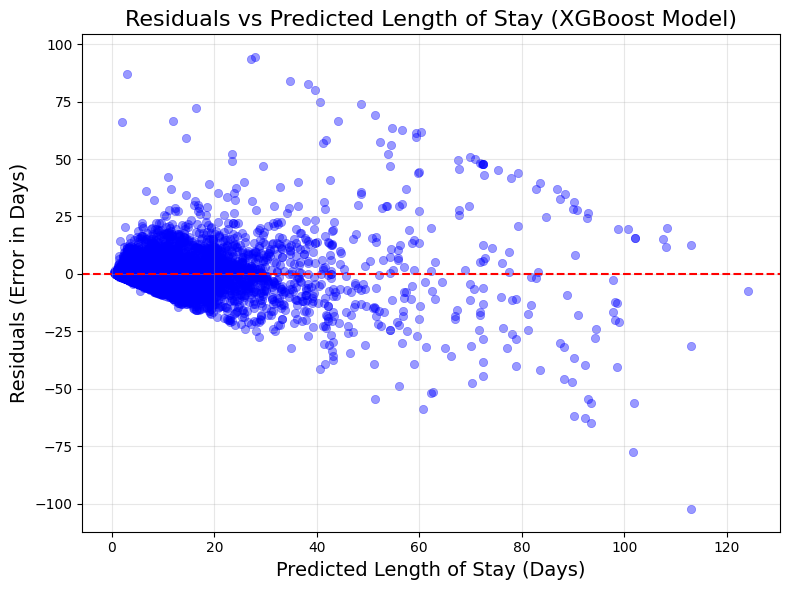

100%|===================| 39943/40000 [03:21<00:00]       

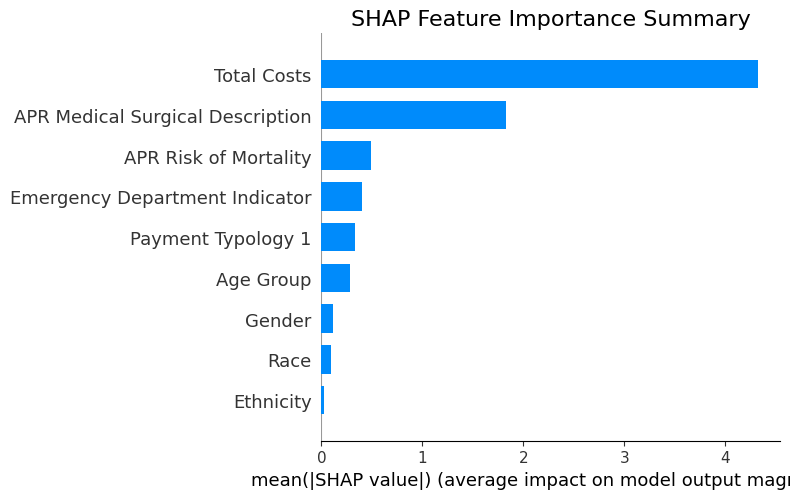

<Figure size 1000x600 with 0 Axes>

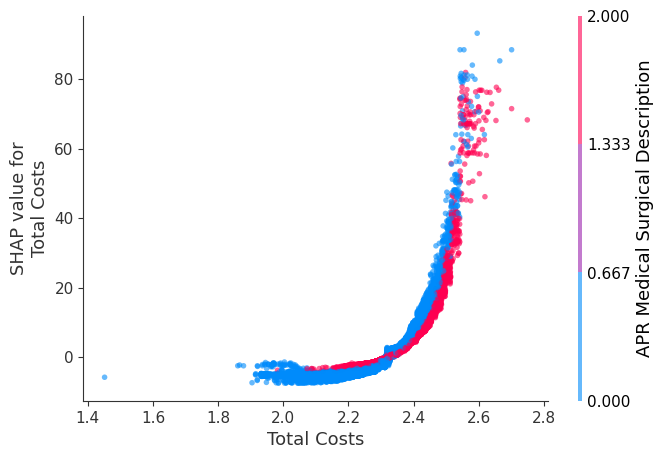

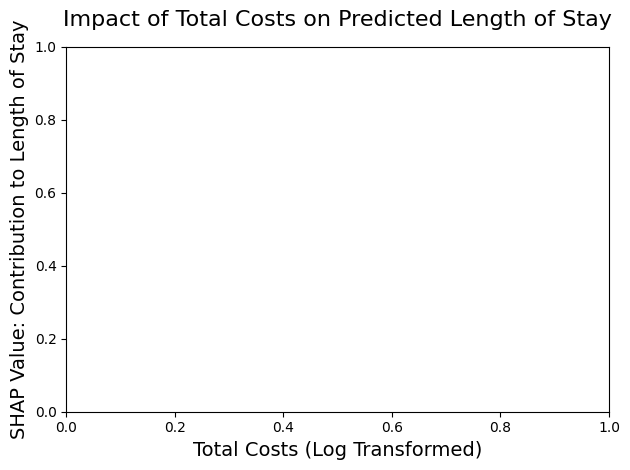

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap

# Step 1: Data Preparation
selected_features = [
    'Age Group', 'Gender', 'Race', 'Ethnicity', 'APR Risk of Mortality',
    'APR Medical Surgical Description', 'Payment Typology 1',
    'Emergency Department Indicator', 'Total Costs'
]
target_variable = 'Length of Stay'

# Example: Replace this with your actual DataFrame
# df = pd.read_csv("your_data.csv")

# Drop rows with missing target values
df = df.dropna(subset=[target_variable])

# Encode categorical features
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    if column in selected_features:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df[selected_features]
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("\nXGBoost Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Step 4: Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")
plt.title("Feature Importances from XGBoost", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()

# Step 5: Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, color="blue", edgecolor=None)
plt.axhline(0, color="red", linestyle="--", linewidth=1.5)
plt.title("Residuals vs Predicted Length of Stay (XGBoost Model)", fontsize=16)
plt.xlabel("Predicted Length of Stay (Days)", fontsize=14)
plt.ylabel("Residuals (Error in Days)", fontsize=14)
plt.grid(alpha=0.3)  # Add light gridlines for readability
plt.tight_layout()
plt.savefig("residuals_vs_predicted_poster.png", dpi=300)  # Save at high resolution for poster
plt.show()


# Step 6: SHAP Summary Plot
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance Summary", fontsize=16)
plt.tight_layout()
plt.savefig("shap_summary_plot.png", dpi=300)
plt.show()
# Generate SHAP Dependence Plot with alpha for transparency
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    "Total Costs",
    shap_values_xgb.values,
    X_test,
    interaction_index="APR Medical Surgical Description",  # Interaction feature
    alpha=0.6  # Add transparency
)

# Add improved title and layout
plt.title("Impact of Total Costs on Predicted Length of Stay", fontsize=16, pad=15)
plt.xlabel("Total Costs (Log Transformed)", fontsize=14)
plt.ylabel("SHAP Value: Contribution to Length of Stay", fontsize=14)
plt.tight_layout()

# Save the plot
plt.savefig("shap_dependence_plot_total_costs_with_alpha_updated.png", dpi=300)
plt.show()







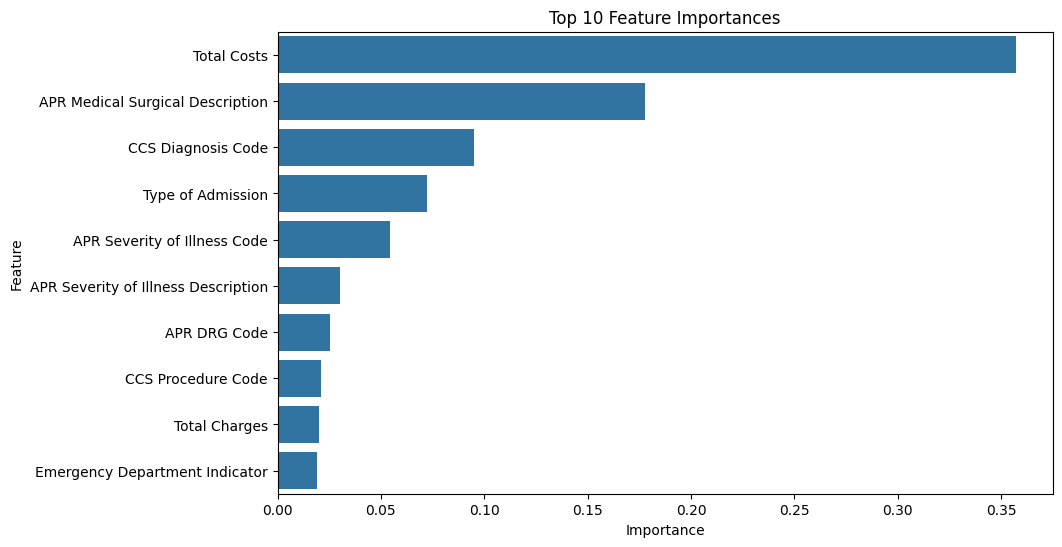

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances')

# Plot the top 10 important features
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')

# Show the plot
plt.show()



# Gradient Boosting Using XGBRegressor

XGBoost Model Metrics:
MAE: 1.768594628688693
RMSE: 3.914242299032115
R²: 0.7367114424705505

SHAP Summary Plot (Global Feature Importance):


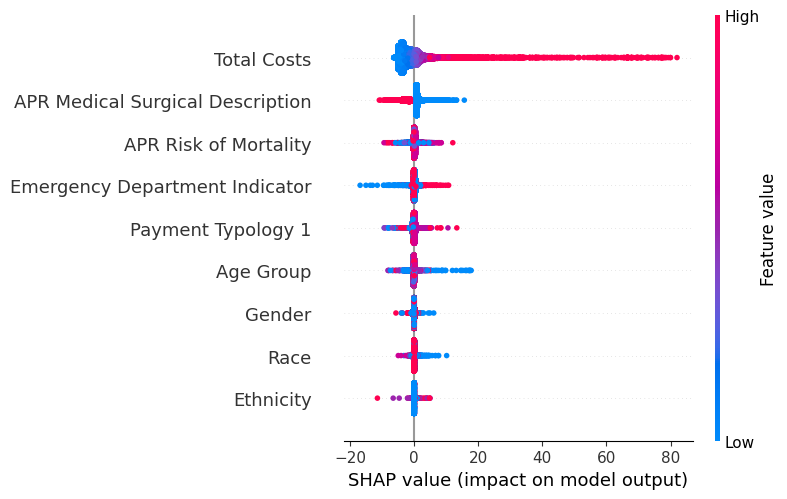

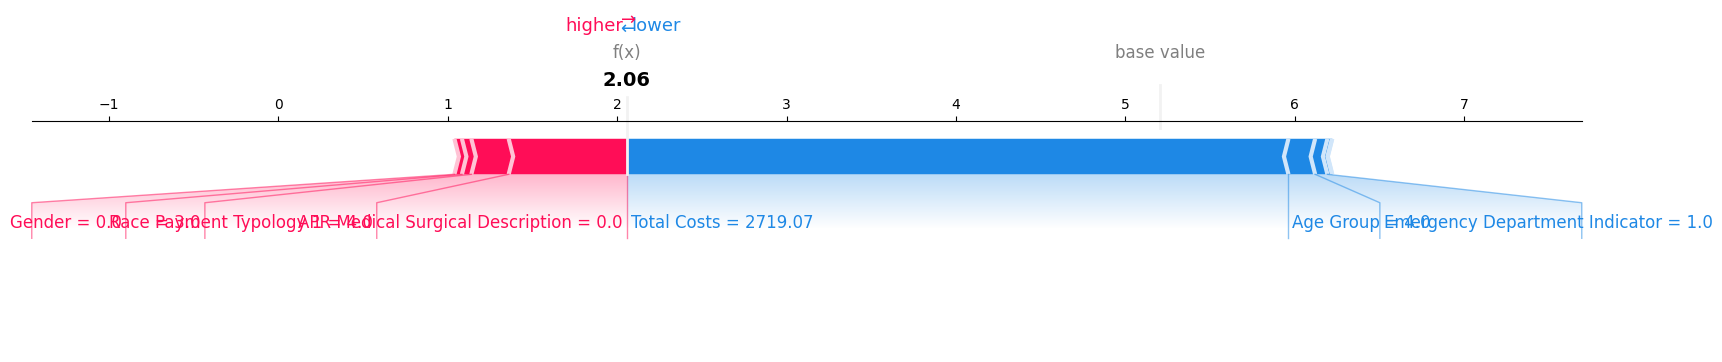

<Figure size 640x480 with 0 Axes>

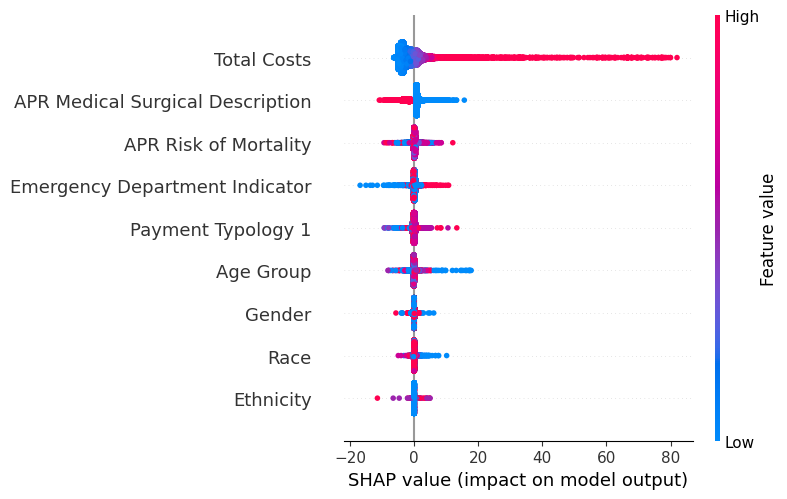

In [ ]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost model (Gradient Boosting)
xgb_model_gb = xgb.XGBRegressor(
    objective="reg:squarederror",  # Regression objective
    n_estimators=90,              # Number of trees
    learning_rate=0.1,            # Step size shrinkage
    max_depth=7,                  # Maximum depth of a tree
    random_state=42               # Reproducibility
)

# Train the model
xgb_model_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model_gb.predict(X_test)

# Evaluate predictions
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Model Metrics:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R²: {r2_xgb}")

# Step 1: Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model_gb)

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Step 3: SHAP Summary Plot (Global Feature Importance)
print("\nSHAP Summary Plot (Global Feature Importance):")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Step 4: SHAP Force Plot (Local Explanation for a Single Prediction)
# Extract SHAP values for a single prediction
single_shap_value = shap_values[0]  # SHAP values for the first prediction
single_row = X_test.iloc[0]         # Corresponding feature values

# Generate and save the force plot
force_plot = shap.force_plot(
    explainer.expected_value,  # Base value of the model
    single_shap_value,         # SHAP values for the single prediction
    single_row,                # Feature values for the single prediction
    matplotlib=True            # Use Matplotlib for better visualization
)

# Save force plot to a file
plt.savefig("shap_force_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# Optional: Save the SHAP summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.tight_layout()
plt.savefig("shap_summary_plot.png", dpi=300)




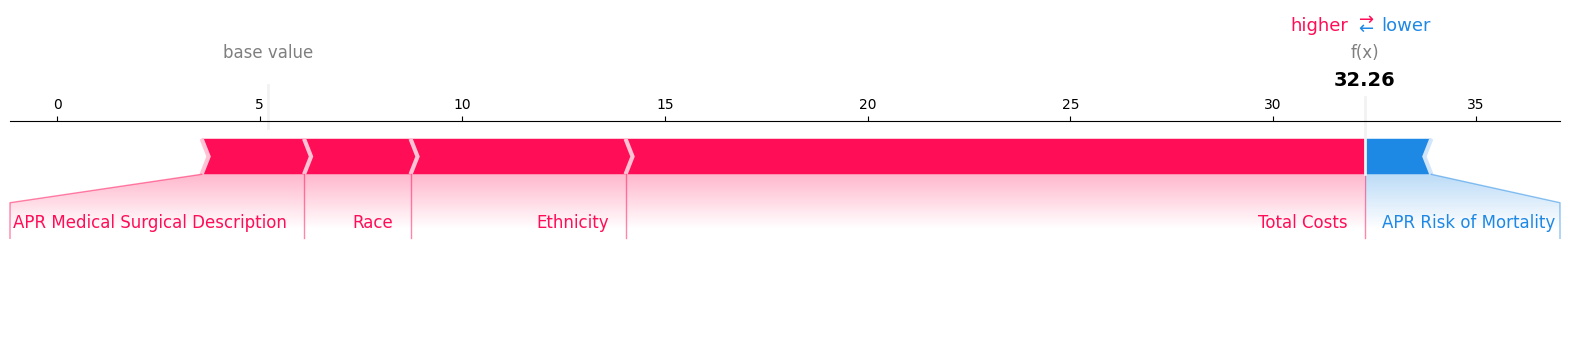

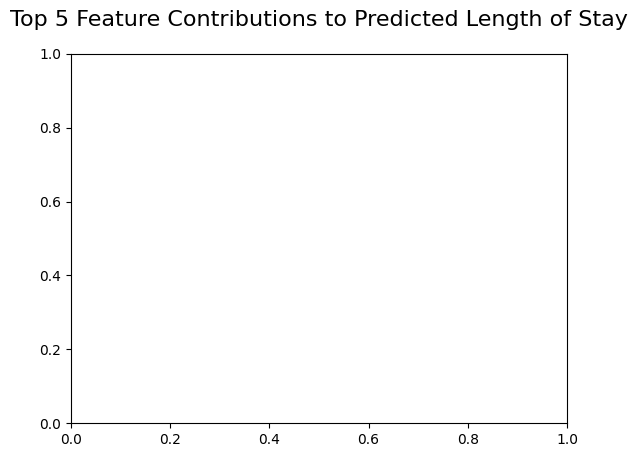

In [ ]:
import shap
import matplotlib.pyplot as plt

# Extract SHAP values for a single prediction (first row in the test set)
single_shap_value = shap_values[0]  # SHAP values for the first prediction
single_row = X_test.iloc[0]         # Feature values for the first row

# Sort the SHAP values to find the top 5 contributing features
sorted_indices = np.argsort(np.abs(single_shap_value))[-5:]  # Indices of top 5 features
top_features_shap_values = single_shap_value[sorted_indices]
top_features_names = X_test.columns[sorted_indices]

# Generate a SHAP force plot for only the top 5 features without numerical values
shap.force_plot(
    explainer.expected_value,
    top_features_shap_values,  # SHAP values for the top 5 features
    feature_names=top_features_names,  # Top 5 feature names without feature values
    matplotlib=True            # Use Matplotlib for high-quality rendering
)

# Add a title to the plot
plt.title("Top 5 Feature Contributions to Predicted Length of Stay", fontsize=16, pad=20)

# Save the plot as a high-resolution image for academic use
plt.savefig("shap_force_plot_top_5_clean.png", dpi=300, bbox_inches="tight")
plt.show()



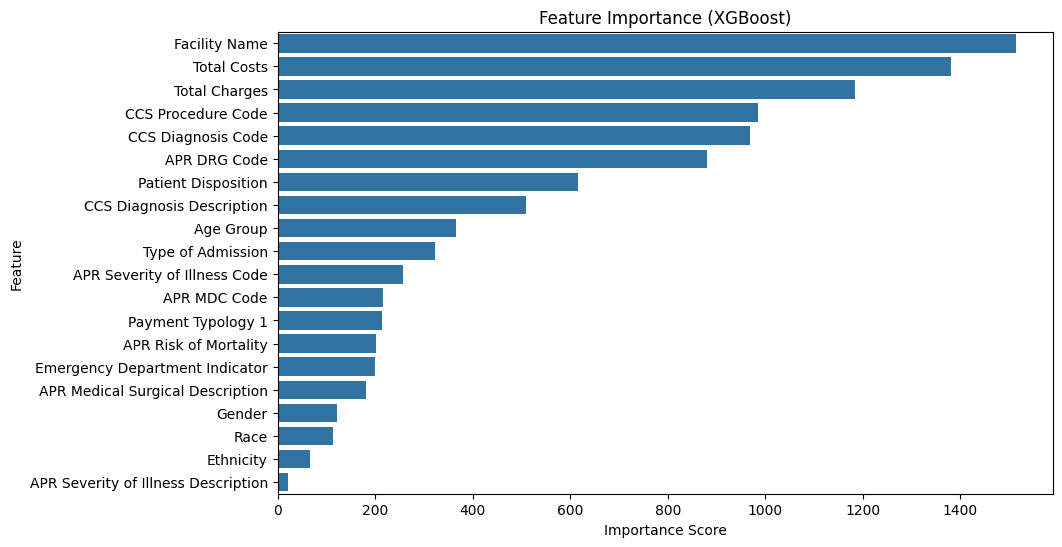

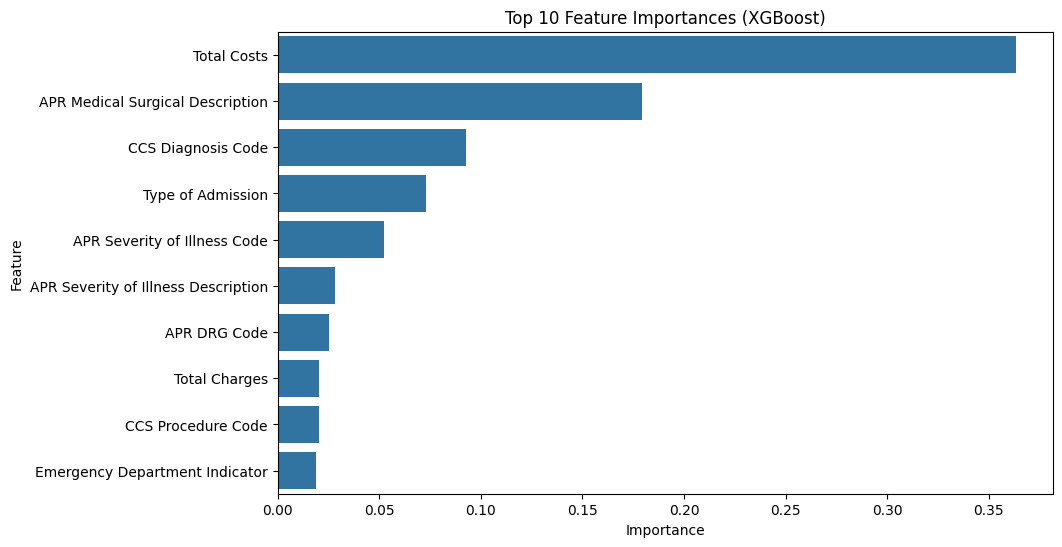

<ipython-input-29-2a4bd315ed53>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


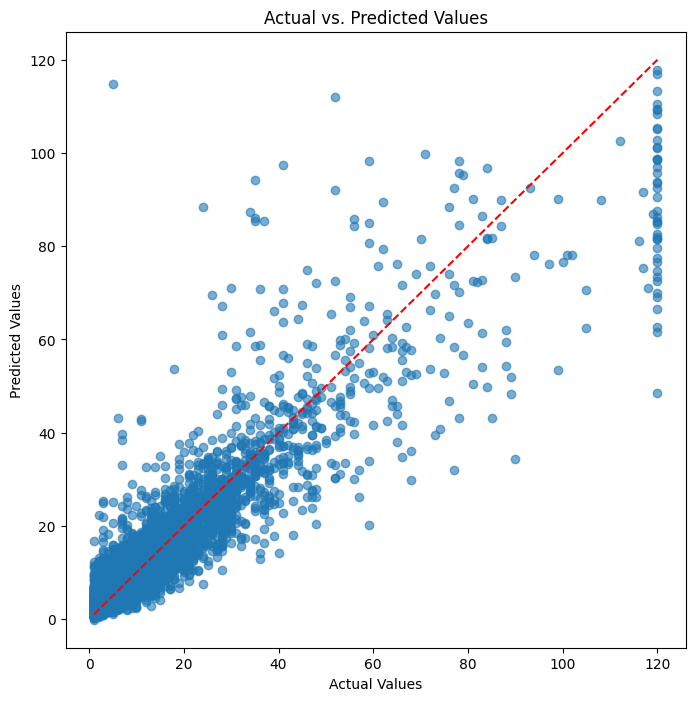

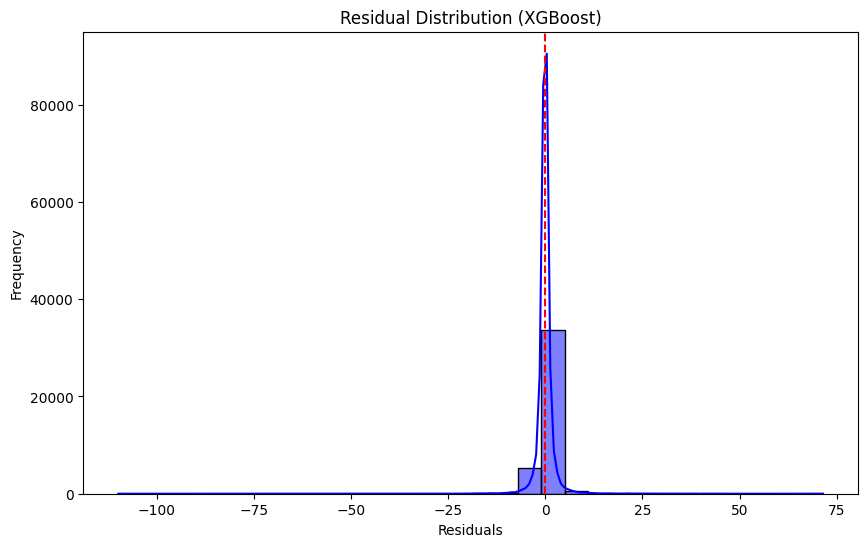

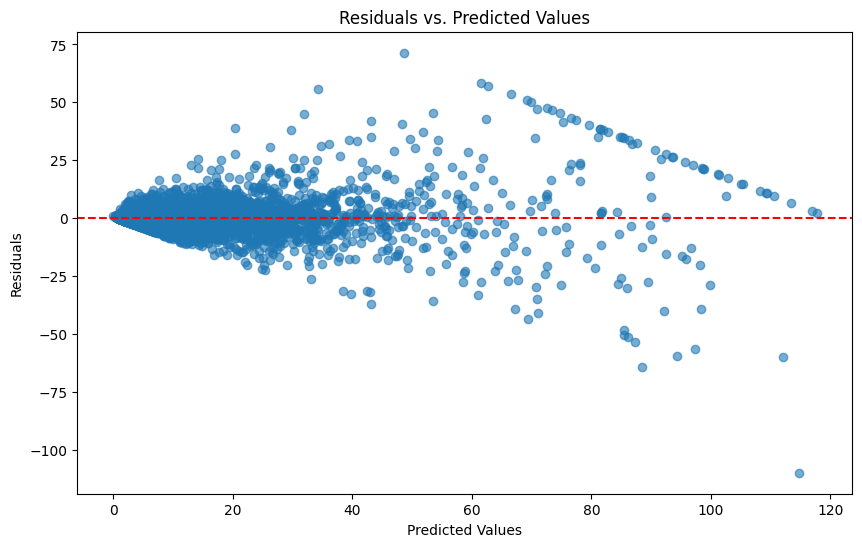

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature Importance Plot
xgb_importance = xgb_model_gb.get_booster().get_score(importance_type='weight')
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importance.keys()),
    'Importance': list(xgb_importance.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Assuming you have already trained your XGBoost model as 'xgb_model_gb'
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained XGBoost model
importance_xgb = xgb_model_gb.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': importance_xgb  # Feature importances from XGBoost
}).sort_values('Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances (XGBoost)')
sns.barplot(data=importance_df_xgb.head(10), x='Importance', y='Feature')
plt.show()

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.show()

# Residual Distribution Plot
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Residual Distribution (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Residuals vs. Predictions Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Explainable Gradient Boosting - Technique Wael Suggested to attempt wont run now will have to try on college laptops

In [ ]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 88.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 16.5 MB/s eta 0:00:00
  Cre

In [ ]:
# 1. Install the necessary package if not already installed
# Run this in your terminal if 'interpret' library is not installed
# pip install interpret shap

# 2. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from interpret.glassbox import ExplainableBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Assuming you have your dataset 'df' loaded with 'X' as features and 'y' as the target
# For example, assuming 'Length of Stay' is your target column:
X = df.drop(columns=["Length of Stay"])  # Features
y = df["Length of Stay"]  # Target

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Explainable Gradient Boosting model (EBM)
ebm_model = ExplainableBoostingRegressor(random_state=42)

# 5. Train the model
ebm_model.fit(X_train, y_train)

# 6. Predict on the test set
y_pred_ebm = ebm_model.predict(X_test)

# 7. Evaluate the model using regression metrics
mae_ebm = mean_absolute_error(y_test, y_pred_ebm)
mse_ebm = mean_squared_error(y_test, y_pred_ebm)
rmse_ebm = mse_ebm ** 0.5
r2_ebm = r2_score(y_test, y_pred_ebm)

# Print evaluation metrics
print(f"Explainable Gradient Boosting Model Metrics:")
print(f"MAE: {mae_ebm}")
print(f"RMSE: {rmse_ebm}")
print(f"R²: {r2_ebm}")

# 8. Get and visualize feature importance (global explanation)
# Explanation of feature importance across the whole model
explanation = ebm_model.explain_global()
from interpret import show
show(explanation)

# 9. Visualize feature contributions to a specific prediction (local explanation)
# You can choose any specific row from X_test, here we are using the first row (index 0)
explanation_local = ebm_model.explain_local(X_test.iloc[0], y_pred_ebm[0])
show(explanation_local)

# 10. Visualizing the effect of individual features on the target variable using SHAP
# Use SHAP to explain the effect of individual features on the model's predictions
explainer = shap.Explainer(ebm_model)
shap_values = explainer(X_test)

# Plot SHAP values (summary plot)
shap.summary_plot(shap_values, X_test)

# 11. Plot the top 10 important features based on the global explanation
importance_ebm = ebm_model.explain_globa




KeyboardInterrupt: 

# SVM - reload dataset into df2 to clean dataset

In [ ]:
import pandas as pd

# Specify the engine explicitly
df2 = pd.read_excel('/content/drive/MyDrive/First200,000.xlsx')

# Display the first few rows to confirm successful loading
print(df2.head())

  Health Service Area Hospital County  Operating Certificate Number  \
0          Western NY        Allegany                      226700.0   
1          Western NY        Allegany                      226700.0   
2          Western NY        Allegany                      226700.0   
3          Western NY        Allegany                      226700.0   
4          Western NY        Allegany                      226700.0   

   Facility Id               Facility Name    Age Group Zip Code - 3 digits  \
0         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
1         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
2         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   
3         37.0  Cuba Memorial Hospital Inc     50 to 69                 147   
4         37.0  Cuba Memorial Hospital Inc  70 or Older                 147   

  Gender   Race          Ethnicity  ...  APR Risk of Mortality  \
0      F  White  Not Span/Hispan

In [ ]:
print(df_encoded.columns)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd
import numpy as np

Index(['Length of Stay', 'Total Charges', 'Total Costs', 'Age Group_18 to 29',
       'Age Group_30 to 49', 'Age Group_50 to 69', 'Age Group_70 or Older',
       'Gender_M', 'Gender_U', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'Ethnicity_Not Span/Hispanic',
       'Ethnicity_Spanish/Hispanic', 'Ethnicity_Unknown',
       'Type of Admission_Emergency', 'Type of Admission_Newborn',
       'Type of Admission_Not Available', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'APR Severity of Illness Description_Major',
       'APR Severity of Illness Description_Minor',
       'APR Severity of Illness Description_Moderate',
       'APR Risk of Mortality_Major', 'APR Risk of Mortality_Minor',
       'APR Risk of Mortality_Moderate',
       'APR Medical Surgical Description_Not Applicable',
       'APR Medical Surgical Description_Surgical',
       'Payment Typology 1_Department of Corrections',
       'Payment Typology 1_Federal/State/Local/VA',
       'Payme

In [ ]:
df2.drop(columns=['CCS Procedure Code','APR DRG Code','APR MDC Code','Payment Typology 2', 'Payment Typology 3',
                 'Zip Code - 3 digits', 'Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility Id', 'Birth Weight', 'Abortion Edit Indicator'], inplace=True)

In [ ]:
df2.drop(columns=['Discharge Year','Facility Name','CCS Diagnosis Code','APR Severity of Illness Code', 'Race', 'Ethnicity', 'Total Charges', ], inplace=True)

In [ ]:
label_counts = df2.nunique().to_frame(name='Unique Labels')

# Display the unique label counts
print(label_counts)

                                     Unique Labels
Age Group                                        5
Gender                                           3
Length of Stay                                 120
Type of Admission                                6
Patient Disposition                             19
CCS Diagnosis Description                      261
CCS Procedure Description                      224
APR DRG Description                            312
APR MDC Description                             26
APR Severity of Illness Description              5
APR Risk of Mortality                            5
APR Medical Surgical Description                 3
Payment Typology 1                              10
Emergency Department Indicator                   2
Total Costs                                 182229


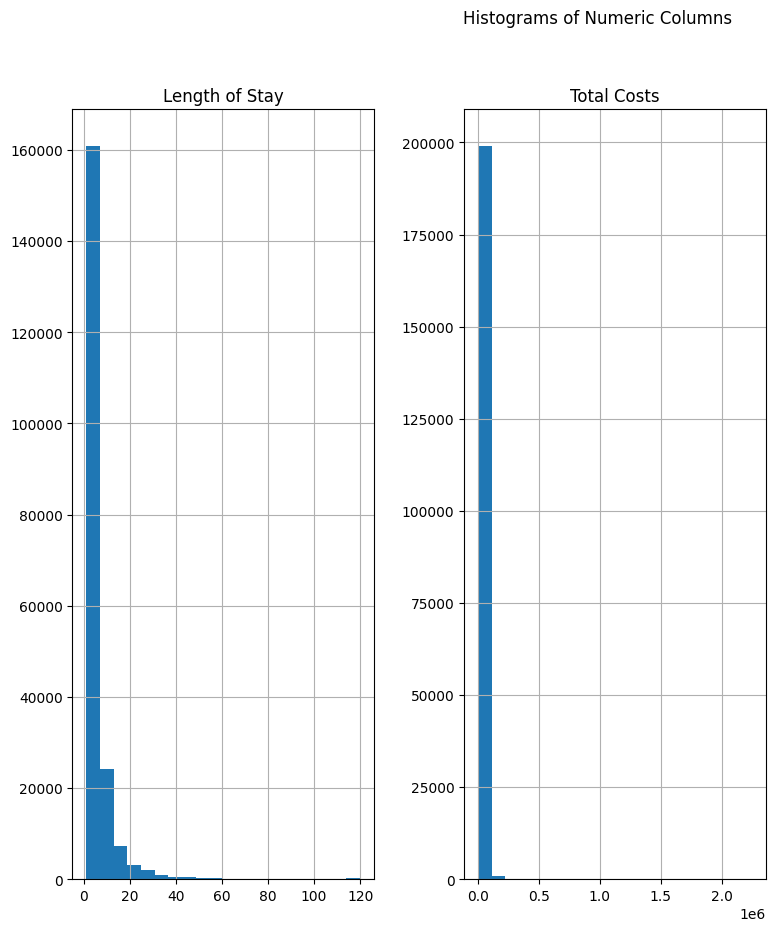

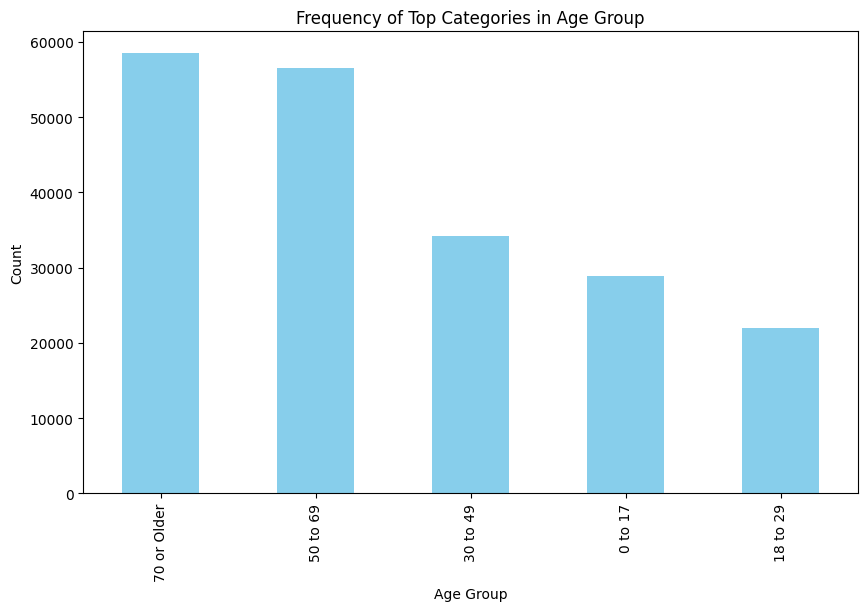

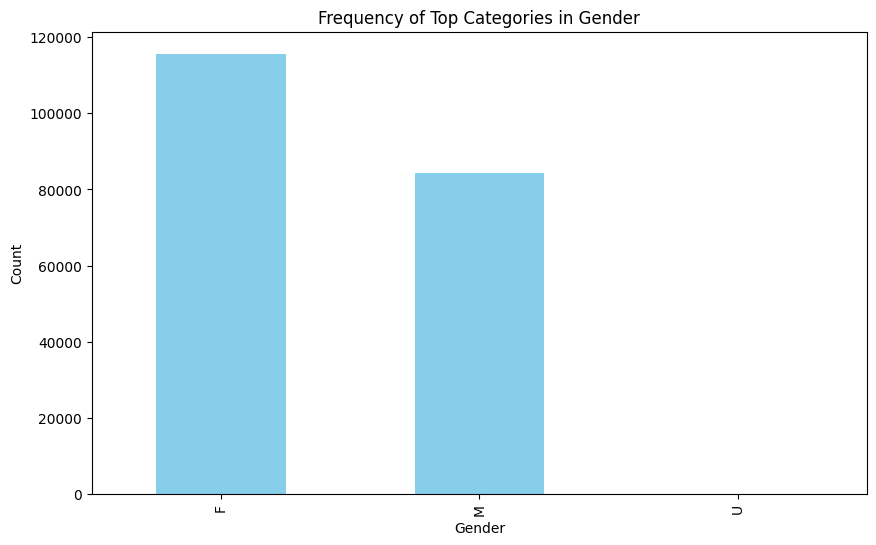

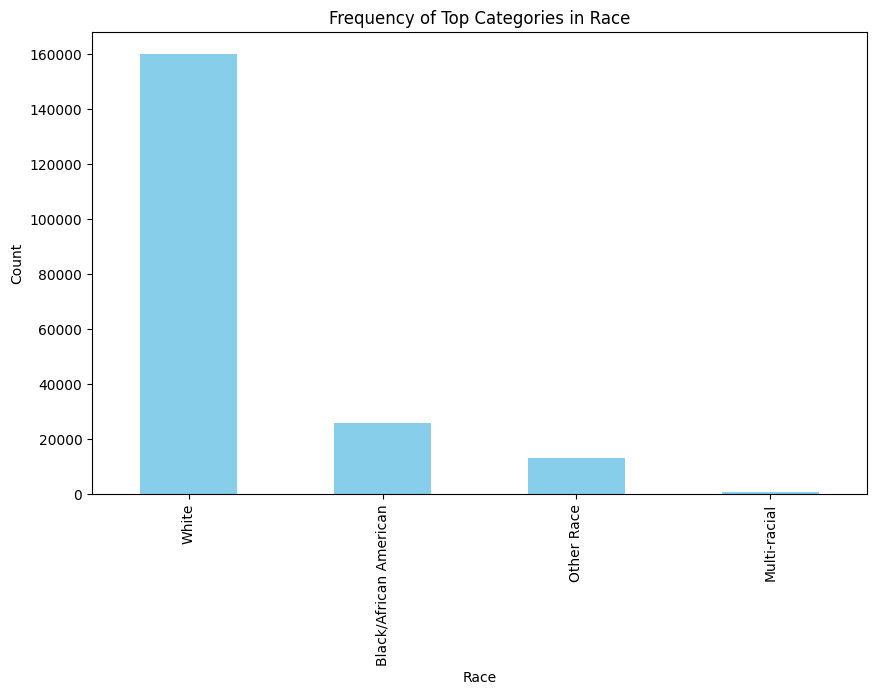

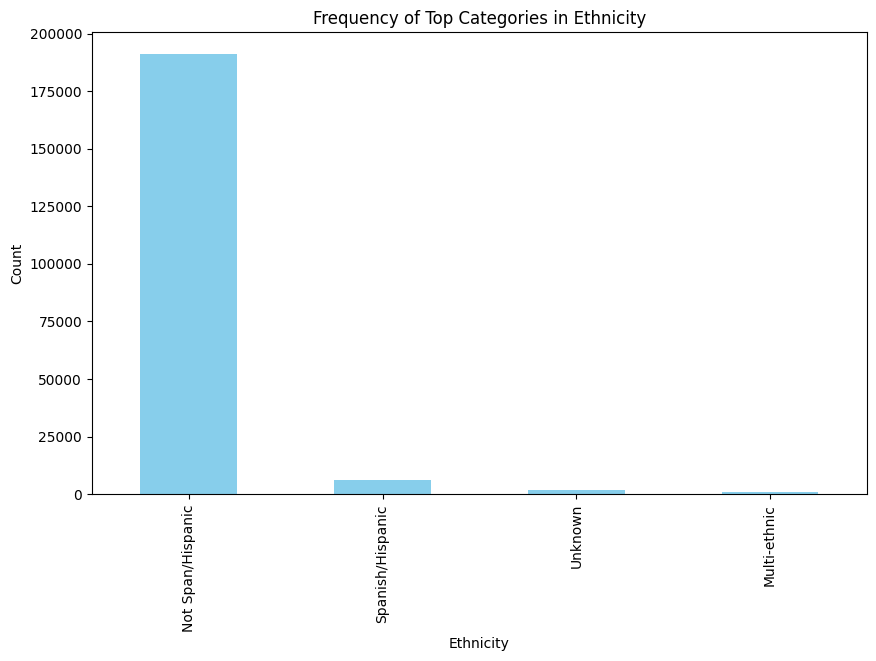

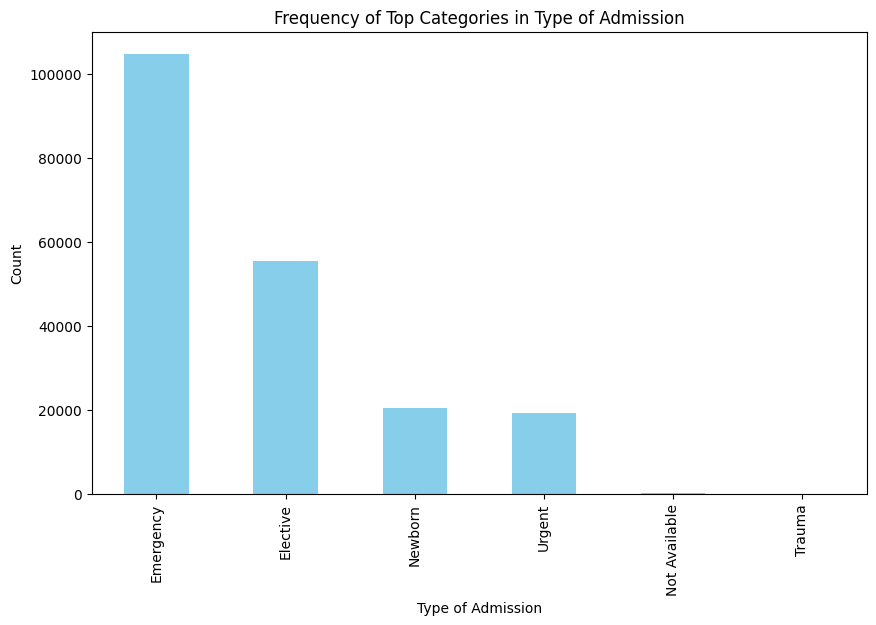

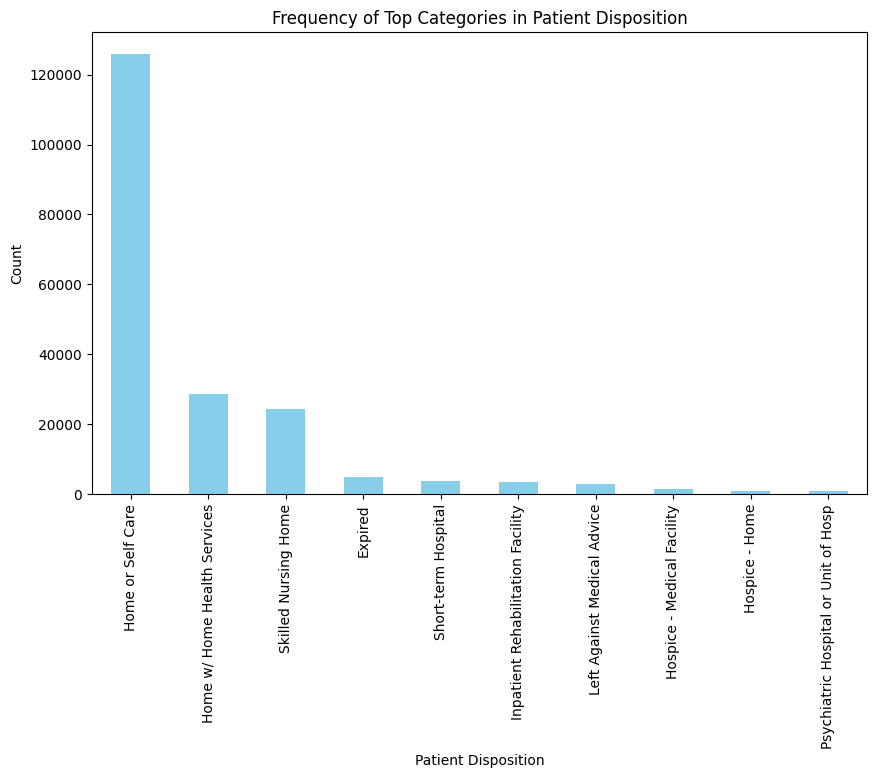

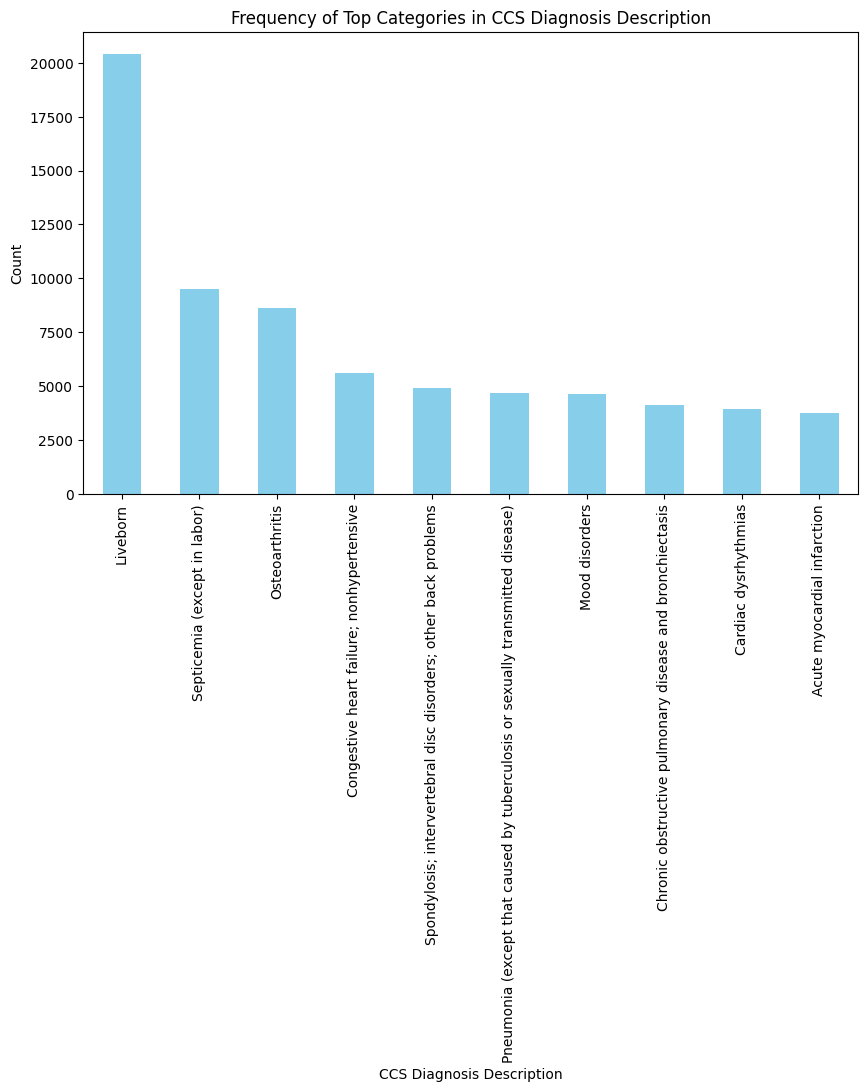

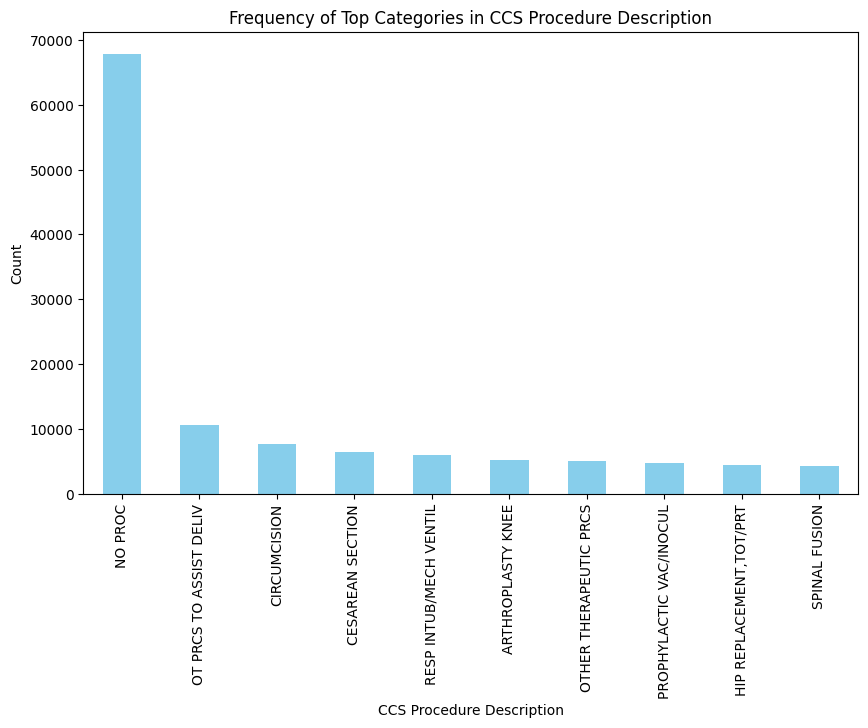

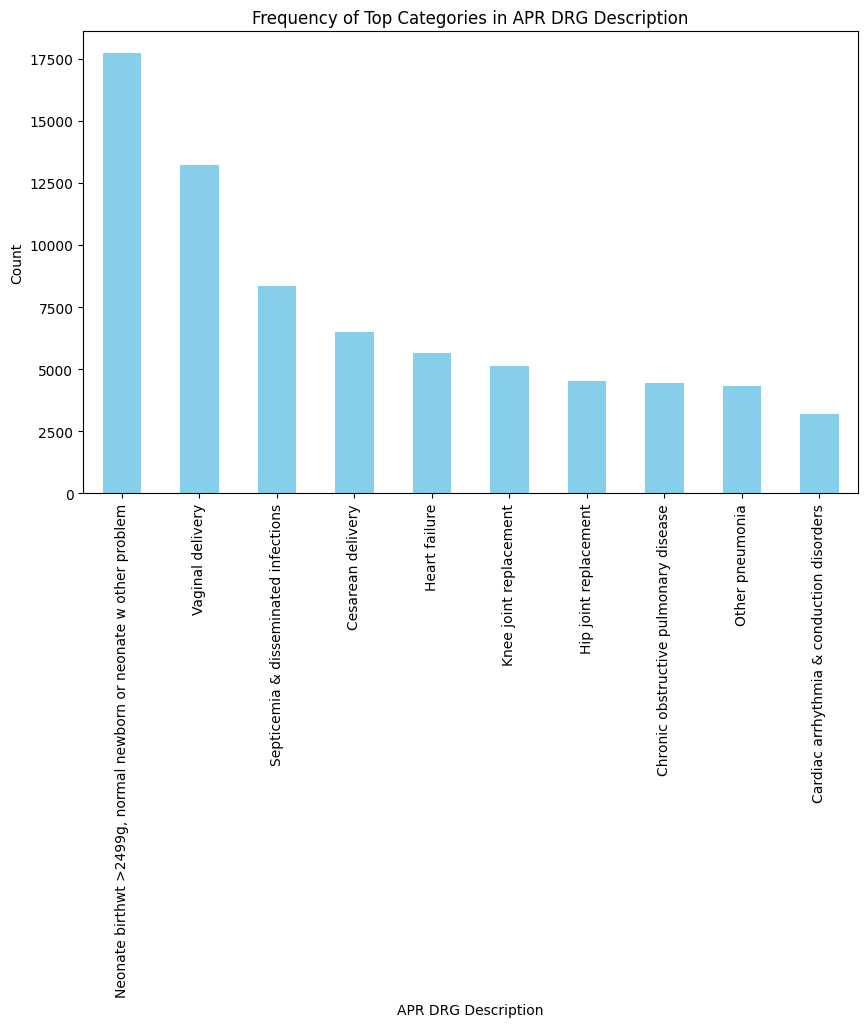

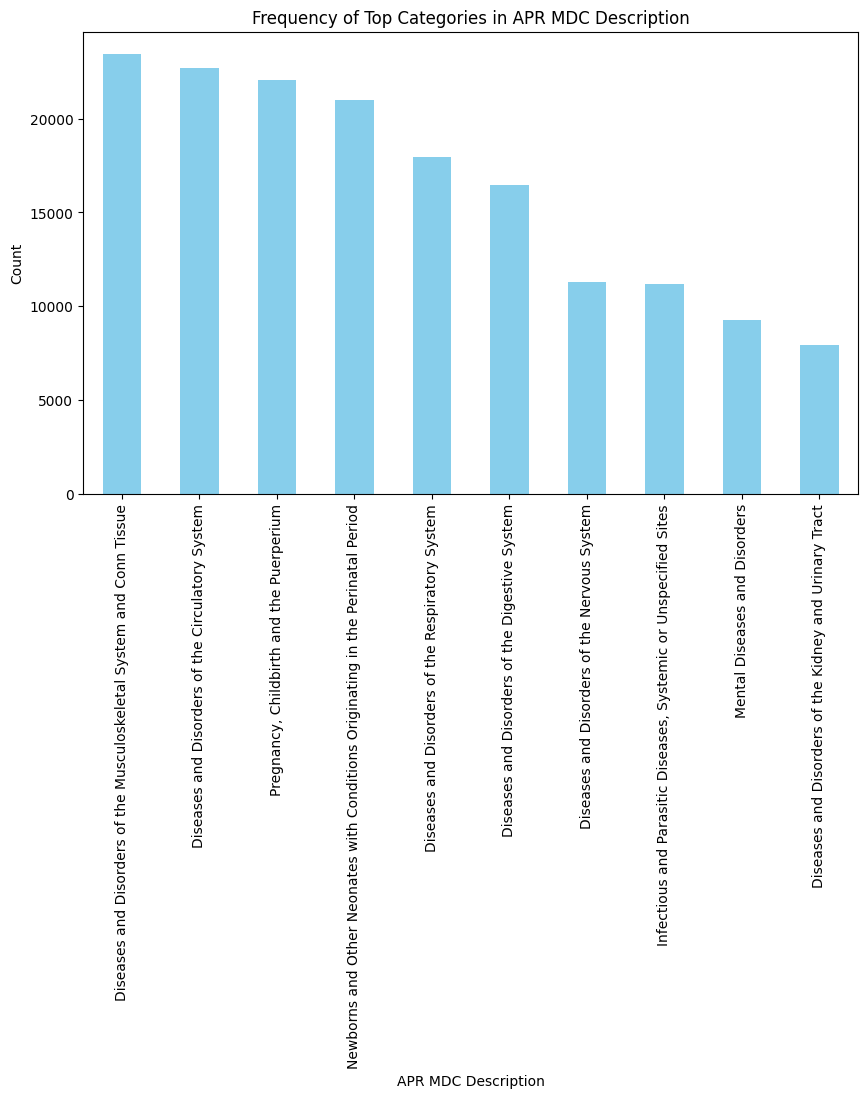

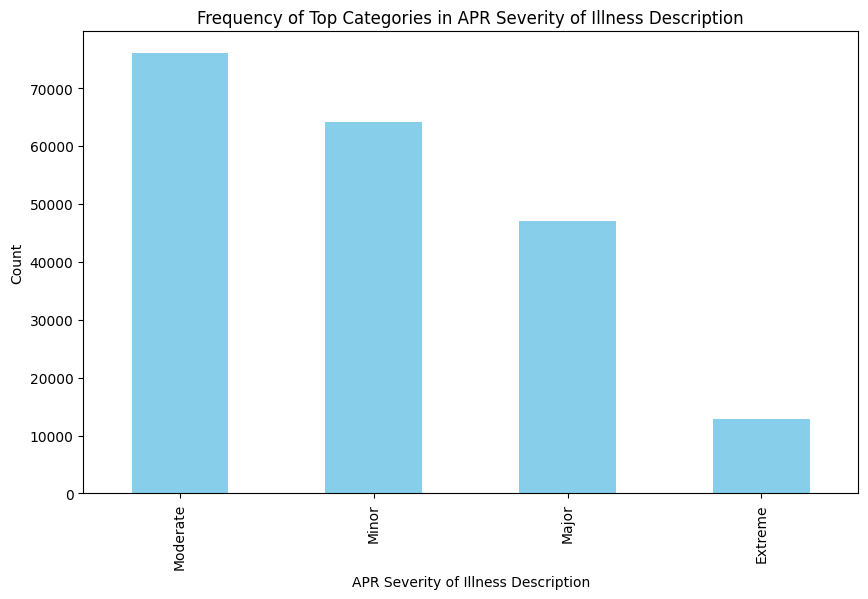

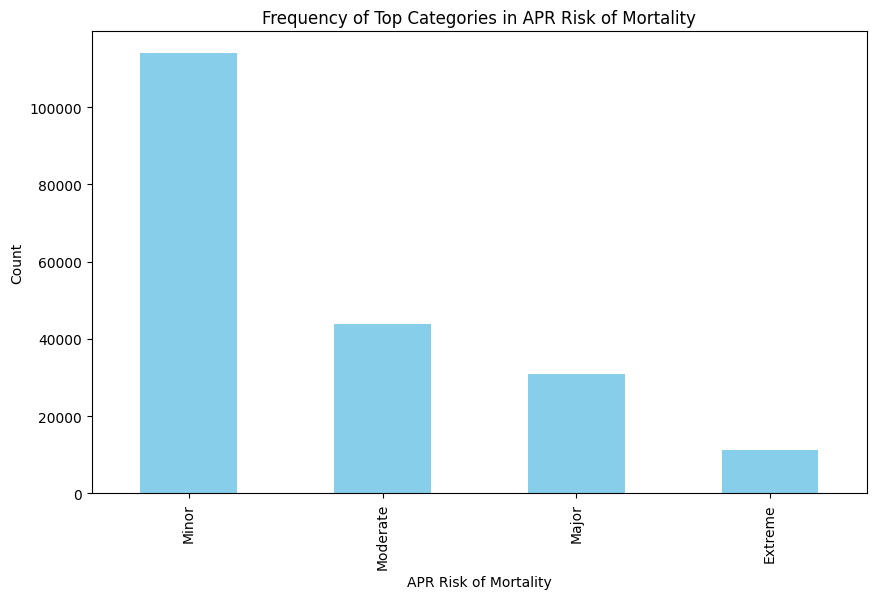

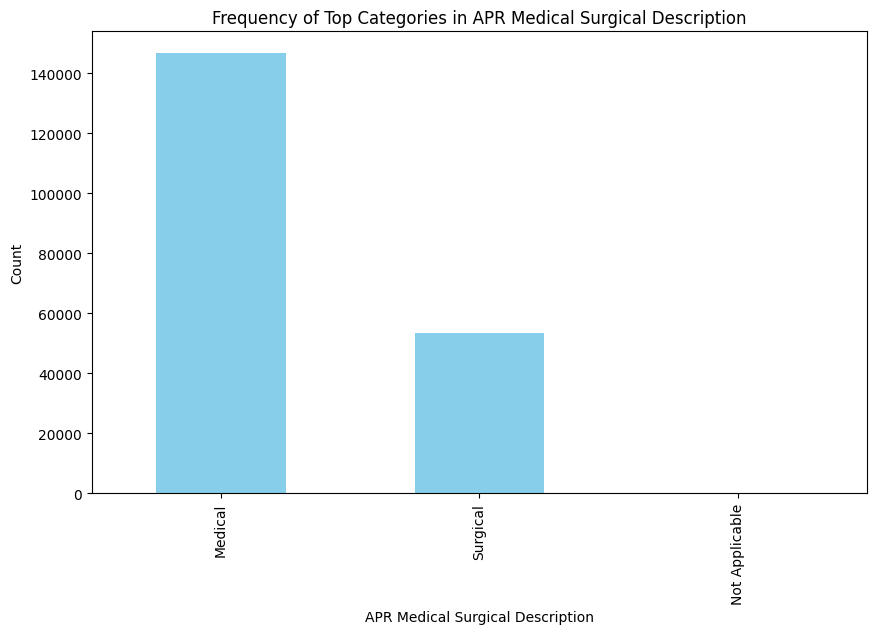

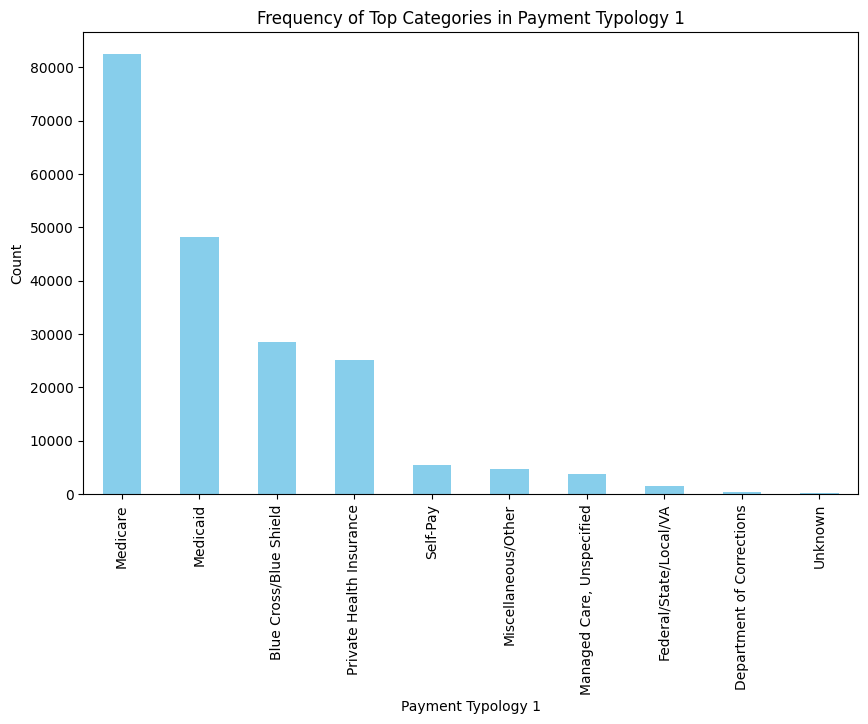

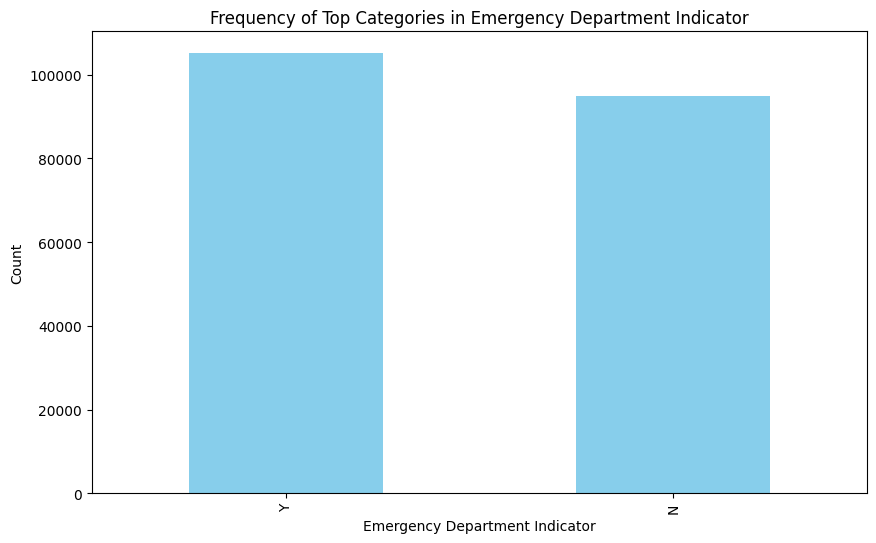

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numeric_cols].hist(bins=20, figsize=(14, 10), layout=(len(numeric_cols) // 3 + 1, 3))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# Plot bar charts for categorical columns
categorical_cols = df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df2[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Top Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
import numpy as np



In [ ]:
top_10 = [x for x in df2['CCS Procedure Description'].value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df2, 'CCS Procedure Description', top_10)

In [ ]:
top_10 = [x for x in df2['APR DRG Description'].value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df2, 'APR DRG Description', top_10)

In [ ]:
top_10 = [x for x in df2['CCS Diagnosis Description'].value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df2, 'CCS Diagnosis Description', top_10)


In [ ]:
top_10 = [x for x in df2['APR MDC Description'].value_counts().sort_values(ascending=False).head(10).index]

top_10
one_hot_top_x(df2, 'APR MDC Description', top_10)

In [ ]:
top_10 = [x for x in df2['Patient Disposition'].value_counts().sort_values(ascending=False).head(10).index]

top_10

['Home or Self Care',
 'Home w/ Home Health Services',
 'Skilled Nursing Home',
 'Expired',
 'Short-term Hospital',
 'Inpatient Rehabilitation Facility',
 'Left Against Medical Advice',
 'Hospice - Medical Facility',
 'Hospice - Home',
 'Psychiatric Hospital or Unit of Hosp']

In [ ]:
def one_hot_top_x(df, variable, top_x_labels):
  for label in top_x_labels:
    df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

one_hot_top_x(df2, 'Patient Disposition', top_10)
df2.head()

Age Group Gender  Length of Stay Type of Admission  \
0  70 or Older      F               4            Urgent   
1  70 or Older      F               4          Elective   
2  70 or Older      F               4            Urgent   
3     50 to 69      F               2          Elective   
4  70 or Older      M               2          Elective   

                     Patient Disposition  \
0                      Home or Self Care   
1  Hosp Basd Medicare Approved Swing Bed   
2                      Home or Self Care   
3                      Home or Self Care   
4                      Home or Self Care   

                           CCS Diagnosis Description  \
0  Pneumonia (except that caused by tuberculosis ...   
1                    Fluid and electrolyte disorders   
2  Pneumonia (except that caused by tuberculosis ...   
3                    Fluid and electrolyte disorders   
4  Pneumonia (except that caused by tuberculosis ...   

  CCS Procedure Description                          APR DRG Description  \
0                   NO PROC                              Other pneumonia   
1                   NO PROC  Hypovolemia & related electrolyte disorders   
2         ELECTROCARDIOGRAM                              Other pneumonia   
3                   NO PROC      Other gastroenteritis, nausa & vomiting   
4                   NO PROC                              Other pneumonia   

                                 APR MDC Description  \
0   Diseases and Disorders of the Respiratory System   
1  Endocrine, Nutritional and Metabolic Diseases ...   
2   Diseases and Disorders of the Respiratory System   
3     Diseases and Disorders of the Digestive System   
4   Diseases and Disorders of the Respiratory System   

  APR Severity of Illness Description  ...  \
0                            Moderate  ...   
1                            Moderate  ...   
2                               Minor  ...   
3                            Moderate  ...   
4                               Minor  ...   

  Patient Disposition_Home or Self Care  \
0                                     1   
1                                     0   
2                                     1   
3                                     1   
4                                     1   

  Patient Disposition_Home w/ Home Health Services  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

  Patient Disposition_Skilled Nursing Home Patient Disposition_Expired  \
0                                        0                           0   
1                                        0                           0   
2                                        0                           0   
3                                        0                           0   
4                                        0                           0   

   Patient Disposition_Short-term Hospital  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Patient Disposition_Inpatient Rehabilitation Facility  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient Disposition_Left Against Medical Advice  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                       

In [ ]:
few_label_columns = df2.nunique()[df2.nunique() <= 10].index.tolist()

# Apply one-hot encoding to those columns
df_encoded = pd.get_dummies(df2, columns=few_label_columns, drop_first=True)
print(df_encoded.head())


   Length of Stay                    Patient Disposition  \
0               4                      Home or Self Care   
1               4  Hosp Basd Medicare Approved Swing Bed   
2               4                      Home or Self Care   
3               2                      Home or Self Care   
4               2                      Home or Self Care   

                           CCS Diagnosis Description  \
0  Pneumonia (except that caused by tuberculosis ...   
1                    Fluid and electrolyte disorders   
2  Pneumonia (except that caused by tuberculosis ...   
3                    Fluid and electrolyte disorders   
4  Pneumonia (except that caused by tuberculosis ...   

  CCS Procedure Description                          APR DRG Description  \
0                   NO PROC                              Other pneumonia   
1                   NO PROC  Hypovolemia & related electrolyte disorders   
2         ELECTROCARDIOGRAM                              Other pneumonia  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming `df_encoded` includes the column 'Total Charges'
if 'Total Costs' in df_encoded.columns:
    # Initialize the scaler
    scaler = StandardScaler()

    # Scale the 'Total Charges' column
    df_encoded['Total Costs'] = scaler.fit_transform(df_encoded[['Total Costs']])

    # Display the scaled column
    print("Scaling applied to 'Total Costs' column successfully.")
else:
    print("'Total Costs' column is not found in the dataset.")


Scaling applied to 'Total Costs' column successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming `df_encoded` includes the column 'Total Charges'
if 'Total Charges' in df_encoded.columns:
    # Initialize the scaler
    scaler = StandardScaler()

    # Scale the 'Total Charges' column
    df_encoded['Total Charges'] = scaler.fit_transform(df_encoded[['Total Charges']])

    # Display the scaled column
    print("Scaling applied to 'Total Charges' column successfully.")
else:
    print("'Total Charges' column is not found in the dataset.")


'Total Charges' column is not found in the dataset.


In [ ]:
df_encoded.drop(columns=['CCS Procedure Description', 'Patient Disposition','APR MDC Description','CCS Diagnosis Description','APR DRG Description'], inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

X = df_encoded.drop('Length of Stay', axis=1)
y = df_encoded['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])


In [ ]:
# Create a SVM Classifier
# Training the pipeline
# pipeline.fit(X_train, y_train)


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Logistic Regression

Visualise and optimise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.utils import resample

# Find the rare class
rare_class = y.value_counts().idxmin()

# Oversample the rare class
rare_class_indices = y[y == rare_class].index
oversampled_indices = resample(rare_class_indices, replace=True, n_samples=2, random_state=42)

# Add the oversampled data back to X and y
X = pd.concat([X, X.loc[oversampled_indices]])
y = pd.concat([y, y.loc[oversampled_indices]])


In [ ]:
X = df_encoded.drop('Length of Stay', axis=1)
y = df_encoded['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Creating a Pipeline for Logistic Regression

# Creating a pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Training the logistic regression pipeline
logistic_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
print(y.value_counts())


Length of Stay
2      48392
3      38651
1      28527
4      21597
5      13845
       ...  
91         2
102        2
108        1
111        1
114        1
Name: count, Length: 120, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/


Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.70      0.54      5716
           2       0.58      0.43      0.49      9580
           3       0.49      0.25      0.33      7795
           4       0.24      0.28      0.26      4404
           5       0.20      0.23      0.21      2764
           6       0.16      0.18      0.17      1988
           7       0.14      0.12      0.13      1524
           8       0.11      0.12      0.12      1080
           9       0.11      0.12      0.12       765
          10       0.09      0.10      0.09       626
          11       0.07      0.09      0.08       451
          12       0.10      0.12      0.11       398
          13       0.06      0.06      0.06       319
          14       0.05      0.07      0.06       335
          15       0.02      0.02      0.02       232
          16       0.07      0.10      0.08       198
          17       0.01      0.01      0.01       175
   

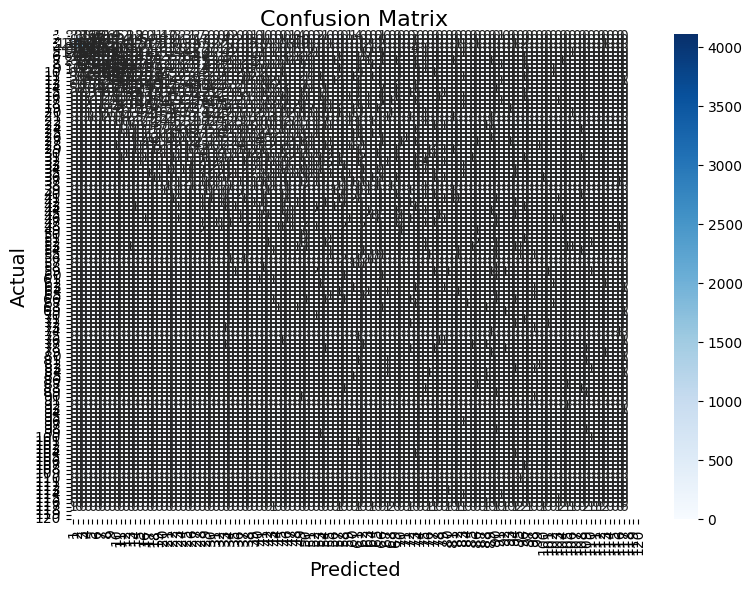

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and preprocess the data
# Example: Replace with your actual DataFrame
# df_encoded = pd.read_csv("your_data.csv")

# Define the target variable
target_variable = 'Length of Stay'

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features
X = X.fillna(0)

# Encode target variable (if categorical)
if y.dtype == 'object' or y.dtype.name == 'category':
    y = pd.factorize(y)[0]

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balance the weights
    classes=np.unique(y),
    y=y
)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with class weights
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight_dict)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.tight_layout()
plt.show()




# Neural Networks

In [ ]:
print(df_encoded.columns)


Index(['Length of Stay', 'Total Charges', 'Total Costs', 'Age Group_18 to 29',
       'Age Group_30 to 49', 'Age Group_50 to 69', 'Age Group_70 or Older',
       'Gender_M', 'Gender_U', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'Ethnicity_Not Span/Hispanic',
       'Ethnicity_Spanish/Hispanic', 'Ethnicity_Unknown',
       'Type of Admission_Emergency', 'Type of Admission_Newborn',
       'Type of Admission_Not Available', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'APR Severity of Illness Description_Major',
       'APR Severity of Illness Description_Minor',
       'APR Severity of Illness Description_Moderate',
       'APR Risk of Mortality_Major', 'APR Risk of Mortality_Minor',
       'APR Risk of Mortality_Moderate',
       'APR Medical Surgical Description_Not Applicable',
       'APR Medical Surgical Description_Surgical',
       'Payment Typology 1_Department of Corrections',
       'Payment Typology 1_Federal/State/Local/VA',
       'Payme

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Identify the top 20 most frequent classes
top_20_classes = y.value_counts().head(20).index

# Step 2: Filter the dataset to include only the top 20 classes
df_encoded_filtered = df_encoded[df_encoded['Length of Stay'].isin(top_20_classes)]

# Step 3: Map the top 20 classes to sequential integers (0 to 19)
class_mapping = {cls: idx for idx, cls in enumerate(top_20_classes)}
df_encoded_filtered.loc[:, 'Length of Stay'] = df_encoded_filtered['Length of Stay'].map(class_mapping)

# Step 4: Update X and y
X = df_encoded_filtered.drop(columns=['Length of Stay'])
y = df_encoded_filtered['Length of Stay']

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: One-Hot Encode the Target
num_classes = len(top_20_classes)
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

print("Data preprocessing completed successfully!")




Data preprocessing completed successfully!


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize target variable (remove `.values`)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))  # Only reshape is needed
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))       # Same for test data

print("Target variable successfully standardized!")



Target variable successfully standardized!


In [ ]:
pip install graphviz


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 26.2140 - mae: 2.3204 - val_loss: 15.7806 - val_mae: 1.6255
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 14.2520 - mae: 1.7777 - val_loss: 14.4317 - val_mae: 1.5705
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 13.6689 - mae: 1.6921 - val_loss: 13.3787 - val_mae: 1.5476
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 12.8543 - mae: 1.6627 - val_loss: 12.4560 - val_mae: 1.5103
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 12.1941 - mae: 1.6234 - val_loss: 12.6924 - val_mae: 1.5227
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11.8156 - mae: 1.6164 - val_loss: 11.7650 - val_mae: 1.4921
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 11.5966 - mae: 1.6160 - val_loss: 11.5808 - val_mae: 1.5255
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 11.8882 - mae: 1.6284 - val_loss: 11.3176 - val_mae: 1.4950
Epoch 9/20
5000/5000 ━━

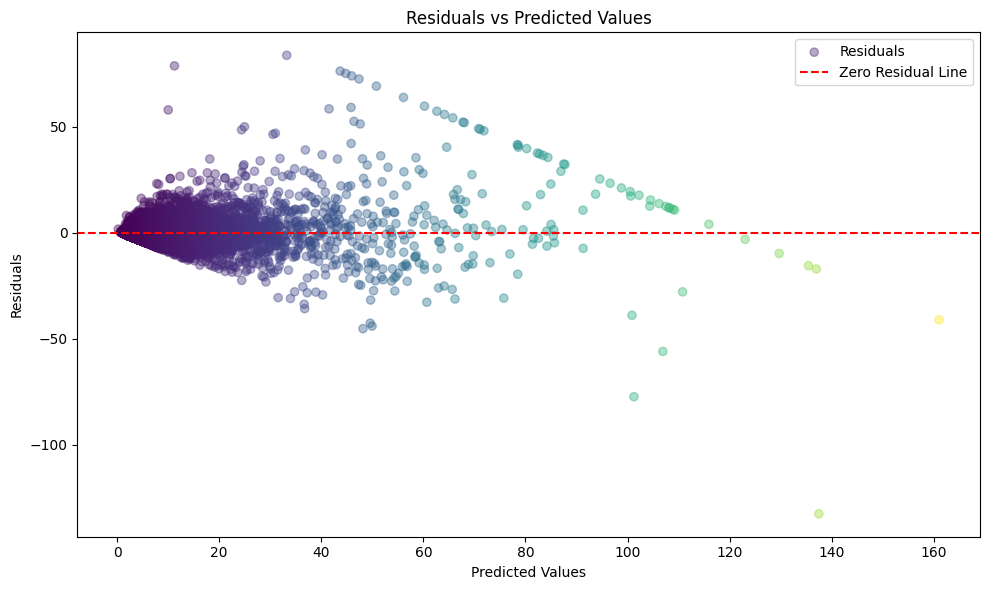


Test Set Metrics:
MAE: 1.50
RMSE: 3.32
R²: 0.82


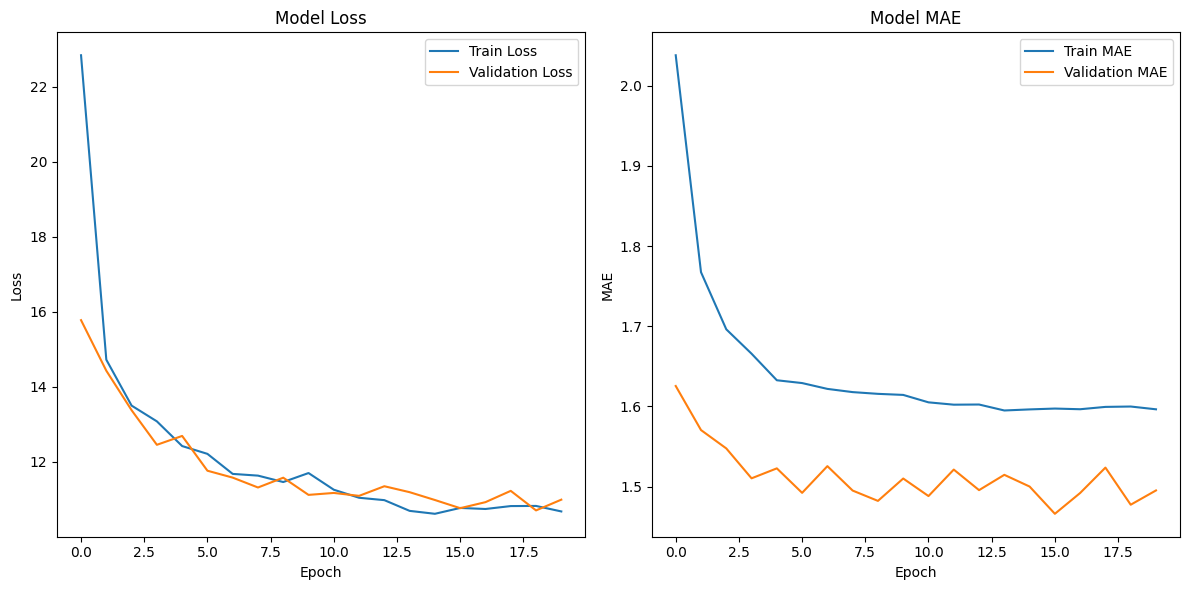

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess your data (example with 'df_encoded')
# Assuming 'df_encoded' is the dataframe you are working with
target_variable = 'Length of Stay'

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features (optional, modify as needed)
X = X.fillna(0)  # Example: Fill missing values with 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model with Adam optimizer and mean squared error loss
adam = Adam(learning_rate=0.001)  # Lower learning rate
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])

# Train the model with more epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Flatten y_pred to match the shape of y_test
y_pred = y_pred.flatten()  # Convert the predictions to a 1D array

# Compute residuals (error between actual and predicted)
residuals = y_test - y_pred

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.4, c=y_pred, cmap="viridis", label="Residuals")
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.tight_layout()
plt.show()

# Compute additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTest Set Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot the loss and accuracy curves during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()







/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 27.4188 - mae: 2.3335 - val_loss: 18.1079 - val_mae: 1.5945
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 15.4043 - mae: 1.7695 - val_loss: 16.0899 - val_mae: 1.5524
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 13.9012 - mae: 1.7051 - val_loss: 13.7982 - val_mae: 1.5295
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 12.0942 - mae: 1.6471 - val_loss: 14.3566 - val_mae: 1.5435
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 12.2120 - mae: 1.6466 - val_loss: 13.2058 - val_mae: 1.4972
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11.7402 - mae: 1.6296 - val_loss: 12.1145 - val_mae: 1.5045
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 11.4024 - mae: 1.5990 - val_loss: 12.0127 - val_mae: 1.5155
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 11.3080 - mae: 1.6045 - val_loss: 11.3794 - val_mae: 1.5127
Epoch 9/20
5000/5000 ━━

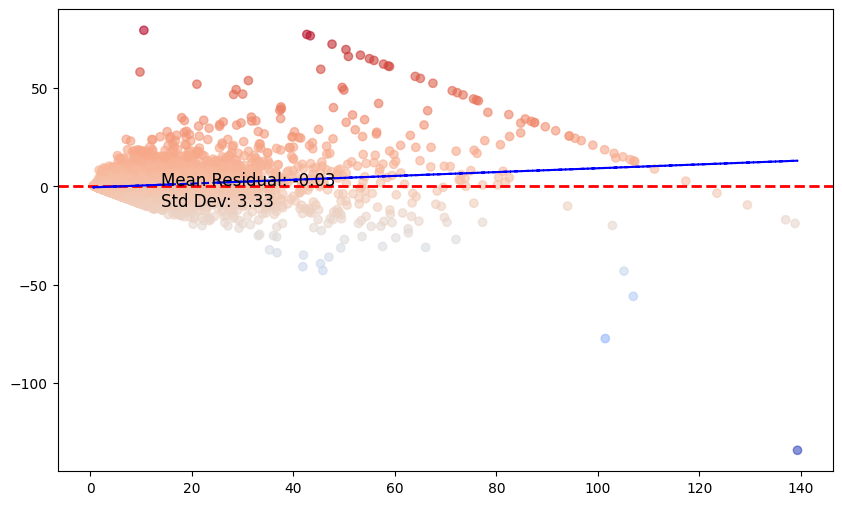

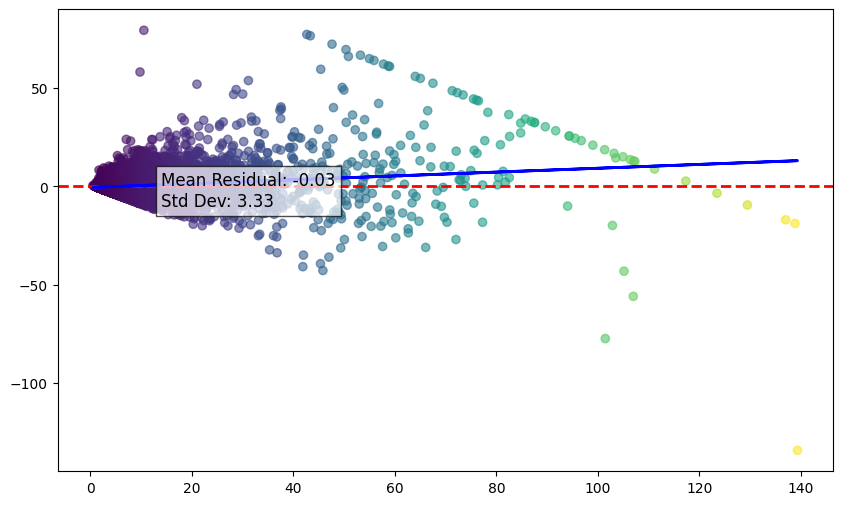

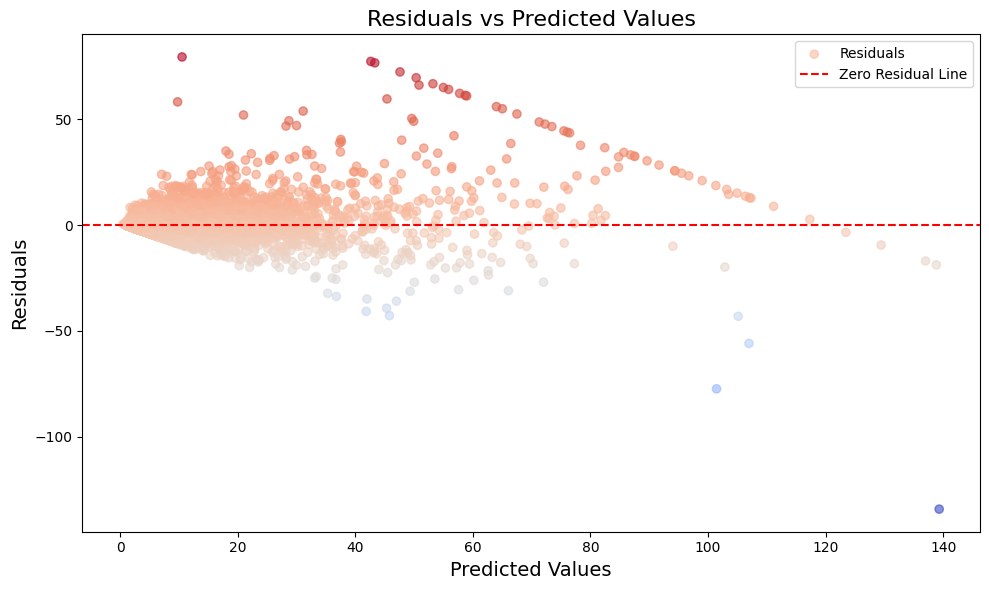


Test Set Metrics:
MAE: 1.49
RMSE: 3.33
R²: 0.82


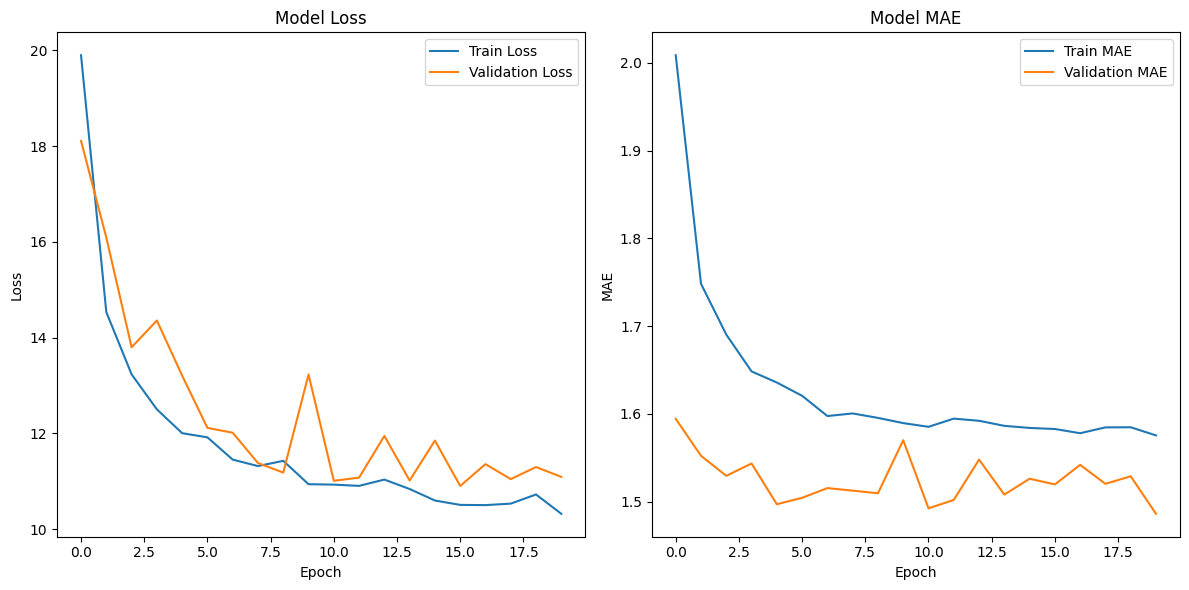

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess your data (example with 'df_encoded')
# Assuming 'df_encoded' is the dataframe you are working with
target_variable = 'Length of Stay'

# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=[target_variable])

# Use all features except the target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Handle missing values in features (optional, modify as needed)
X = X.fillna(0)  # Example: Fill missing values with 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model with Adam optimizer and mean squared error loss
adam = Adam(learning_rate=0.001)  # Adam optimizer with learning rate 0.001
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])

# Train the model with more epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Flatten y_pred to match the shape of y_test
y_pred = y_pred.flatten()  # Convert the predictions to a 1D array

# Compute residuals (error between actual and predicted)
residuals = y_test - y_pred

# Clear Residuals vs Predicted Values Plot with enhanced visuals
plt.figure(figsize=(10, 6))

# Scatter plot of residuals with transparency and color gradient
scatter = plt.scatter(
    y_pred, residuals, alpha=0.6, c=residuals, cmap="coolwarm", label="Residuals"
)

# Add a horizontal line for zero residuals
plt.axhline(0, color='red', linestyle='--', linewidth=2, label="Zero Residual Line")

# Add a trendline for residuals
z = np.polyfit(y_pred, residuals, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial object
plt.plot(y_pred, p(y_pred), color='blue', linestyle='--', label="Trendline")

# Annotate with statistics: mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.text(0.1 * max(y_pred), -10,
         f"Mean Residual: {mean_residual:.2f}\nStd Dev: {std_residual:.2f}",
         fontsize=12, color='black')

# Titles and axis labels
# Plot the residuals vs predicted values after removing outliers
# Improved Residuals vs Predicted Plot

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot with improved colors, transparency, and a color bar
scatter = plt.scatter(y_pred, residuals, alpha=0.6, c=y_pred, cmap="viridis", label="Residuals")

# Add a horizontal line for zero residuals
plt.axhline(0, color='red', linestyle='--', linewidth=2, label="Zero Residual Line")

# Add a trendline for residuals
z = np.polyfit(y_pred, residuals, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial object for the trendline
plt.plot(y_pred, p(y_pred), color='blue', linestyle='-', linewidth=2, label="Trendline")

# Annotate with statistics: mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.text(0.1 * max(y_pred), -10,
         f"Mean Residual: {mean_residual:.2f}\nStd Dev: {std_residual:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

# Titles and axis labels
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, c=residuals, cmap="coolwarm", label="Residuals")
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals vs Predicted Values", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()



# Compute additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTest Set Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot the loss and accuracy curves during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Plot the residuals vs predicted values after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_no_outliers, residuals_no_outliers, alpha=0.6, c=y_pred_no_outliers, cmap="coolwarm", label="Residuals (No Outliers)")
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals vs Predicted Values (No Outliers)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines for better visibility
plt.tight_layout()

# Display the plot
plt.show()



NameError: name 'y_pred_no_outliers' is not defined

<Figure size 1000x600 with 0 Axes>

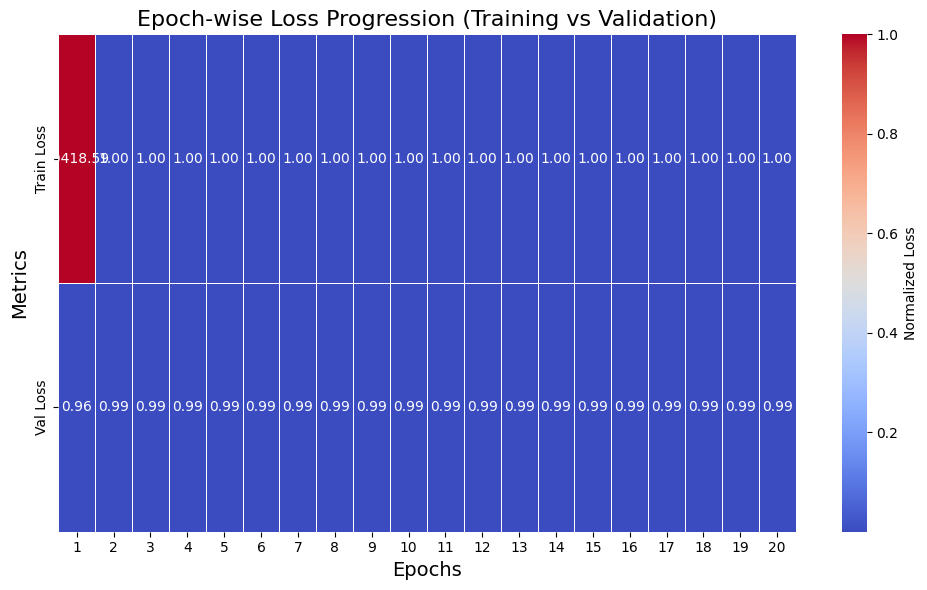

In [ ]:
plt.figure(figsize=(10, 6))

# Normalize the values to improve heatmap contrast
max_loss = max(data.values.flatten())
normalized_data = data / max_loss

# Heatmap with normalized values
sns.heatmap(
    normalized_data.T,
    annot=data.T,  # Show original values as annotations
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Normalized Loss'},
)

# Update the title and labels
plt.title("Epoch-wise Loss Progression (Training vs Validation)", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Metrics", fontsize=14)

# Save and display the plot
plt.tight_layout()
plt.savefig("improved_training_validation_loss_heatmap.png", dpi=300)
plt.show()




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6869/6869 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6869/6869 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6857/6857 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


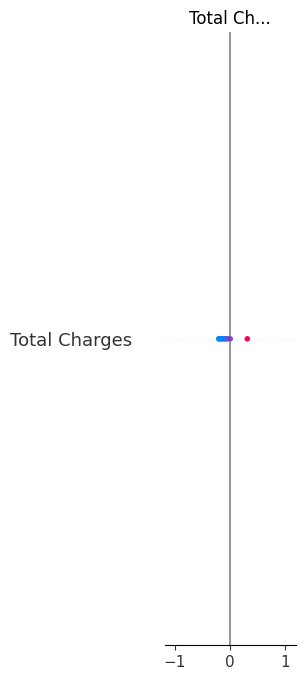

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a SHAP explainer
# Use KernelExplainer as a fallback for non-Tree-based models
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Sampling for efficiency

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(X_test[:10])  # Limit to 50 samples for faster computation

# Step 3: Visualize SHAP values
# Summary Plot (global interpretability)
shap.summary_plot(shap_values, X_test[:10], feature_names=df_encoded.drop(columns=['Length of Stay']).columns)

# Step 4: Visualize Single Prediction (local interpretability)
sample_index = 0  # Change this to visualize other test samples
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test[sample_index], matplotlib=True)


In [ ]:
results['Residuals'] = results['Actual'] - results['Predicted']
results['Residuals'].hist(bins=30)

NameError: name 'results' is not defined

# Mess

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79417c003010>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


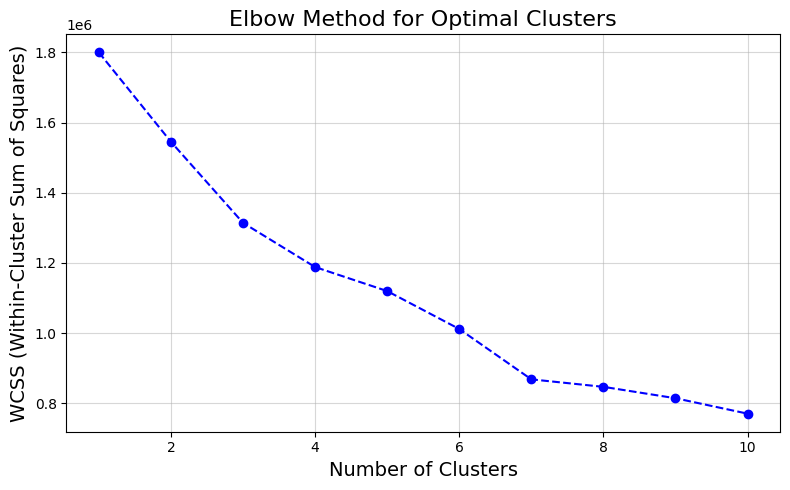

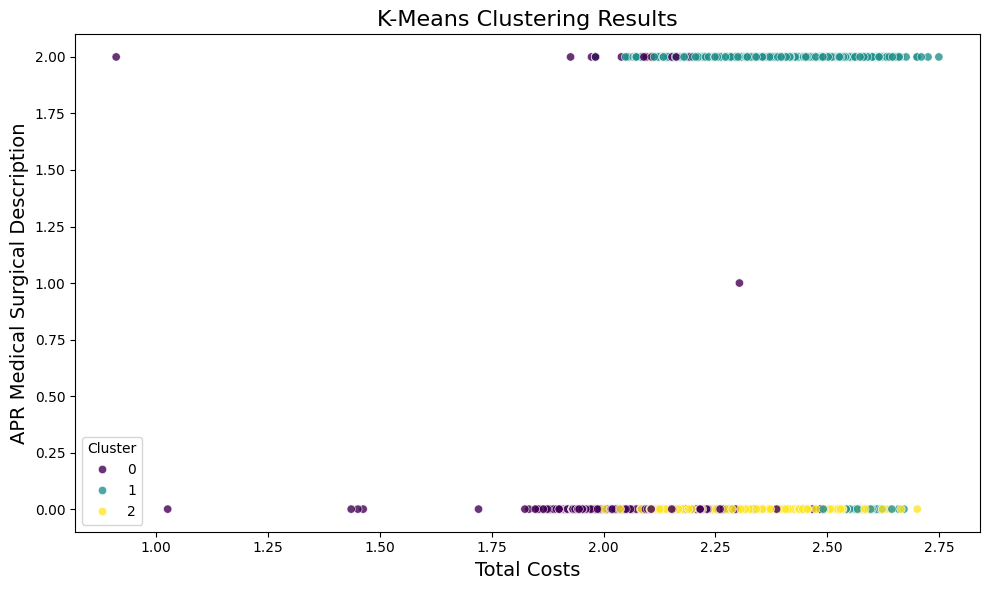

Cluster Centroids:
   Age Group    Gender      Race  Ethnicity  APR Risk of Mortality  \
0   0.809405  0.358091  2.350085   1.096638               2.044968   
1   2.805244  0.396137  2.640131   1.038464               1.983866   
2   3.256473  0.474134  2.587392   1.020436               1.875816   

   APR Medical Surgical Description  Payment Typology 1  \
0                          0.010228            3.727640   
1                          1.978414            4.289845   
2                          0.000109            4.723929   

   Emergency Department Indicator  Total Costs  
0                        0.160831     2.185225  
1                        0.279052     2.351807  
2                        0.886197     2.275740  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features for clustering
# Ensure df_encoded contains only relevant columns
features = ['Age Group', 'Gender', 'Race', 'Ethnicity', 'APR Risk of Mortality',
    'APR Medical Surgical Description', 'Payment Typology 1',
    'Emergency Department Indicator', 'Total Costs']  # Add more if needed
df_clustering = df[features]

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

# Step 3: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Fit K-Means with the optimal number of clusters (e.g., 3 clusters)
optimal_clusters = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters in a 2D plot (using two key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clustering['Total Costs'],
    y=df_clustering['APR Medical Surgical Description'],
    hue=df_encoded['Cluster'],
    palette='viridis',
    alpha=0.8
)
plt.title('K-Means Clustering Results', fontsize=16)
plt.xlabel('Total Costs', fontsize=14)
plt.ylabel('APR Medical Surgical Description', fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Step 6: Analyze the cluster centroids
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Transform centroids back to original scale
centroid_df = pd.DataFrame(cluster_centroids, columns=features)
print("Cluster Centroids:")
print(centroid_df)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df.drop(columns=['Length of Stay'])  # Replace 'target_column' with your actual target column name
y = df['Length of Stay']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert categorical columns to 'category' dtype for XGBoost
for col in categorical_columns:
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model with categorical support
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True  # Enable categorical support
)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


XGBoost Model Metrics:
MAE: 1.0469597706234486
RMSE: 2.6007895487190202
R²: 0.867129385471344


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Convert categorical columns to 'category' dtype
categorical_columns = ['Health Service Area', 'Hospital County', 'Facility Name',
                       'Zip Code - 3 digits', 'CCS Procedure Description',
                       'APR DRG Description', 'Abortion Edit Indicator']

for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Initialize the XGBoost model with categorical support
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    enable_categorical=True  # Enable categorical feature support
)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

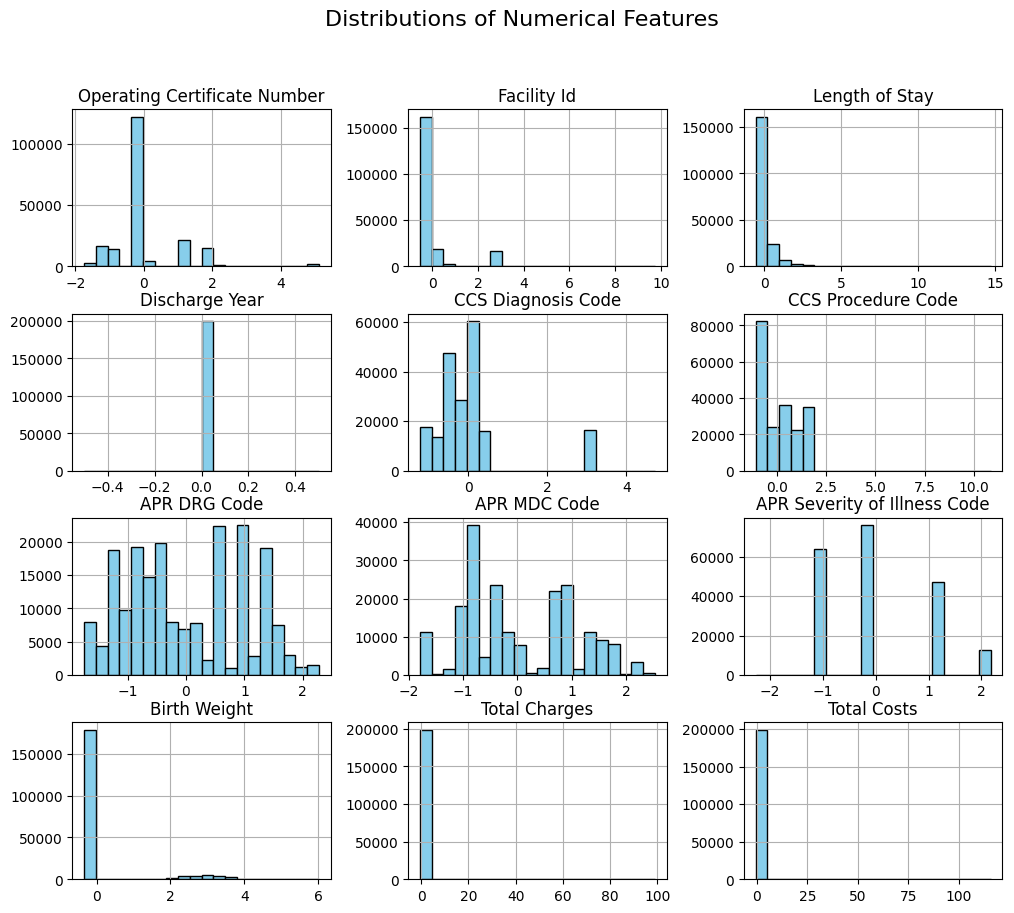

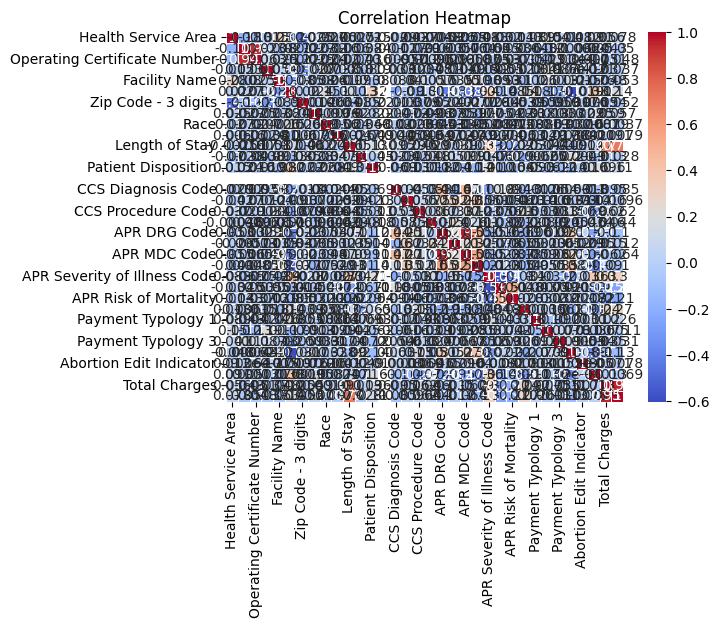

In [ ]:
for col in categorical_cols:
    # Convert the column to a consistent data type (string in this case)
    df[col] = df[col].astype(str)  # This line added to enforce string type
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scaling numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Visualize numerical distributions and correlations
df[numerical_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()